# **Saudi Arabia Used Cars**

[Saudi Arabia Used Cars Dataset](https://drive.google.com/drive/folders/123QthHe9ECfB1qUFCfDinHibrNhsnZKQ)

---

## **1. Bussiness Problem Understanding**

### **1.1. Context**

Industri mobil bekas menjadi salah satu industri penting yang diperkirakan akan mengalami peningkatan pada tahun mendatang. Perusahaan industri mobil bekas membantu penjual dan pembeli dalam melakukan transaksi jual-beli mobil bekas, termasuk dalam menentukan harga yang sesuai dengan pasar. Saat ini di Saudi Arabia terdapat banyak sekali perusahaan industri mobil bekas. Dalam kondisi ini banyak sekali mobil bekas yang masih dalam tahap penjualan dan pembelian. Untuk membantu perusahaan khususnya divisi pengguna atau divisi relationship manager untuk menentukan harga jual yang tepat guna meningkatkan sales opportunity dan menarik pelanggan baru. Saya sebagai data scientist di perusahaan diminta untuk membantu memberikan solusi dan rekomendasi melalu pembuatan model terhadap permasalahan melalui data yang sudah dimiliki oleh perusahaan

### **1.2. Problem Statement**

Salah satu tantangan utama dalam industri mobil bekas adalah mengestimasi harga mobil bekas untuk pembeli atau penjual yang ingin mengikuti tren pasar. Penentuan harga mobil bekas berdasarkan merek, jenis mesin, tahun, dan faktor lainnya membutuhkan keahlian profesional yang memahami kondisi mobil dan skema harga yang sesuai berdasarkan pengalaman sebelumnya. Dalam situasi ini, diperlukan sebuah model yang dapat memberikan perkiraan harga mobil bekas berdasarkan data historis.

Model tersebut akan memberikan kemudahan bagi pembeli dengan memberikan informasi tentang kualitas mobil, baik itu dalam kondisi yang sangat baik, baik, atau buruk. Di sisi lain, model ini juga dapat membantu para pelaku bisnis mobil bekas dalam menentukan harga jual berdasarkan data pasar, serta memberi tahu apakah harga tersebut dapat dinegosiasikan.

### **1.3. Goals**
Dalam menghadapi tantangan tersebut, industri mobil bekas memerlukan alat untuk memprediksi harga mobil bekas yang dapat diandalkan bagi pengguna yang ingin membeli atau menjual mobil berdasarkan rincian seperti spesifikasi mobil dan jarak tempuh. Sehingga jika seseorang ingin menjual mobilnya, kita dapat memberikan perkiraan harga berdasarkan tren pasar dan sesuai dengan spesifikasi mobil untuk membantu pengguna mengatasi kesulitan dalam menentukan harga.

### **1.4. Analytic Approach**
Jadi, yang perlu dilakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, sehingga dapat membedakan satu fitur dengan yang lainnya.

Selanjutnya, kita akan membangun model regresi yang akan membantu perusahaan untuk mendapatkan *tool* prediksi harga mobil bekas yang baru masuk dengan tujuan untuk menghindari harga mobil bekas yang *overprice* atau *underprice* sehingga memudahkan perusahaan untuk menentukan harga mobil bekas

### **1.5 Metric Evaluation**
Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE. 
- Root Mean Squared Error (RMSE): akar kuadrat dari MSE, sehingga menghasilkan skala yang sama dengan variabel target. RMSE berguna untuk menafsirkan kesalahan prediksi dengan mudah dalam satuan yang sama dengan variabel target. Seperti MSE, semakin rendah nilai RMSE, semakin baik modelnya. 
- Mean Absolute Error (MAE): Mengukur rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. MAE mengabaikan arah perbedaan antara prediksi dan nilai sebenarnya. Semakin rendah nilai MAE, semakin baik modelnya. 
- Mean Absolute Percentage Error (MAPE): Mengukur persentase rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya dibandingkan dengan nilai sebenarnya. MAPE berguna untuk mengevaluasi kesalahan prediksi dalam persentase relatif terhadap skala variabel target. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. 
- R-squared (R^2) atau Coefficient of Determination: Mengukur seberapa baik variasi dalam variabel target dapat dijelaskan oleh model. R-squared berkisar antara 0 dan 1, dengan nilai 1 menunjukkan bahwa model menjelaskan seluruh variasi dalam variabel target dan nilai 0 menunjukkan bahwa model tidak menjelaskan sama sekali variasi dalam variabel target. Semakin tinggi nilai R-squared, semakin baik modelnya.

Namun, metrik ini tidak valid untuk model non-linear.

----

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score, KFold

# algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# metric
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## **2. Data Understanding**

#### 
- Dataset merupakan data Used Cars di Saudi Arabia pada tahun 2022.
- Setiap baris data merepresentasikan informasi terkait mobil, jenis dan harga.

In [2]:
df= pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (5624, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


### **2.1. Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Type of used car |
| Region | Object | The region in which the used car was offered for sale |
| Make | Object | The company name |
| Gear_Type | Object | Gear type size of used car |
| Origin | Object | Origin of used car |
| Options | Object | Options of used car |
| Year | Integer | Manufacturing year |
| Engine_Size | Float | The engine size of used car |
| Mileage | Object | Mileage of used car |
| Negotiable | Boolean | True if the price is 0, that means it is negotiable |
| Price | Integer | Used car price |

<br>

#### Variable Description

- `Type` : Jenis atau tipe dari mobil bekas

- `Region` : Wilayah tempat mobil bekas tersebut berada

- `Make` : Nama perusahaan pembuat mobil bekas

- `Gear_Type` : Jenis transmisi mobil bekas

- `Origin` : Asal didapatkannya mobil bekas

- `Options` : Pilihan-pilihan mobil bekas

- `Year` : Tahun pembuatan mobil bekas

- `Engine_Size` : Jenis ukuran mesin mobil bekas

- `Mileage` : Jarak tempuh mobil bekas

- `Negotiable` : Status negosiasi mobil bekas

- `Price` : Harga mobil bekas (dalam Riyal)

Pada tabel di atas, dapat terlihat bahwa dataset ini memiliki 11 kolom. Dalam 11 kolom tersebut terbagi menjadi 10 kolom fitur (*Independant Variable*) dan 1 kolom target (*Dependant Variable*). Tujuan dari proyek ini adalah memprediksi harga mobil berdasarkan fitur yang terdapat pada dataset.

### **2.2. Exploratory Data Analysis**

Exploratory data analysis digunakan untuk memeriksa data dan mendapatkan insight. Ini akan memberikan pemahaman dasar tentang data kita, distribusinya, nilai null, dan banyak lagi. Jadi, kita akan melakukan Exploratory Data Analysis (EDA) pada data untuk pemahaman yang lebih baik.

Seperti yang telah disebutkan sebelumnya, kolom `Price` adalah variabel target dan kolom-kolom lainnya adalah variabel independen. Variabel independen ini kemudian dibagi lagi menjadi variabel Kategorikal dan Numerikal.

Berikut ini kita pisahkan masing-masing tipe variabel itu sendiri:

- **Numerical Variabels** : Year, Engine_Size, Mileage, Price
- **Categorical Variabels** : Type, Region, Make, Gear_Type, Origin, Options, Negotiable

**Numerical Variabels**

Untuk Numerical Variabels, kita dapat memperoleh wawasan dan korelasi dengan menggunakan Pair Plot. Karena Pair Plot menampilkan grafik pasangan untuk semua variabel numerikal dalam daftar, dan kita dapat melihat korelasi antara variabel numerikal.

Exploratory data analysis digunakan untuk memeriksa data dan mendapatkan insight. Ini akan memberikan pemahaman dasar tentang data kita, distribusinya, nilai null, dan banyak lagi. Jadi, kita akan melakukan Exploratory Data Analysis (EDA) pada data untuk pemahaman yang lebih baik.

Seperti yang telah disebutkan sebelumnya, kolom `Price` adalah variabel target dan kolom-kolom lainnya adalah variabel independen. Variabel independen ini kemudian dibagi lagi menjadi variabel Kategorikal dan Numerikal.

Berikut ini kita pisahkan masing-masing tipe variabel itu sendiri:

- **Numerical Variabels** : Year, Engine_Size, Mileage, Price
- **Categorical Variabels** : Type, Region, Make, Gear_Type, Origin, Options, Negotiable

**Numerical Variabels**

Untuk Numerical Variabels, kita dapat memperoleh wawasan dan korelasi dengan menggunakan Pair Plot. Karena Pair Plot menampilkan grafik pasangan untuk semua variabel numerikal dalam daftar, dan kita dapat melihat korelasi antara variabel numerikal.

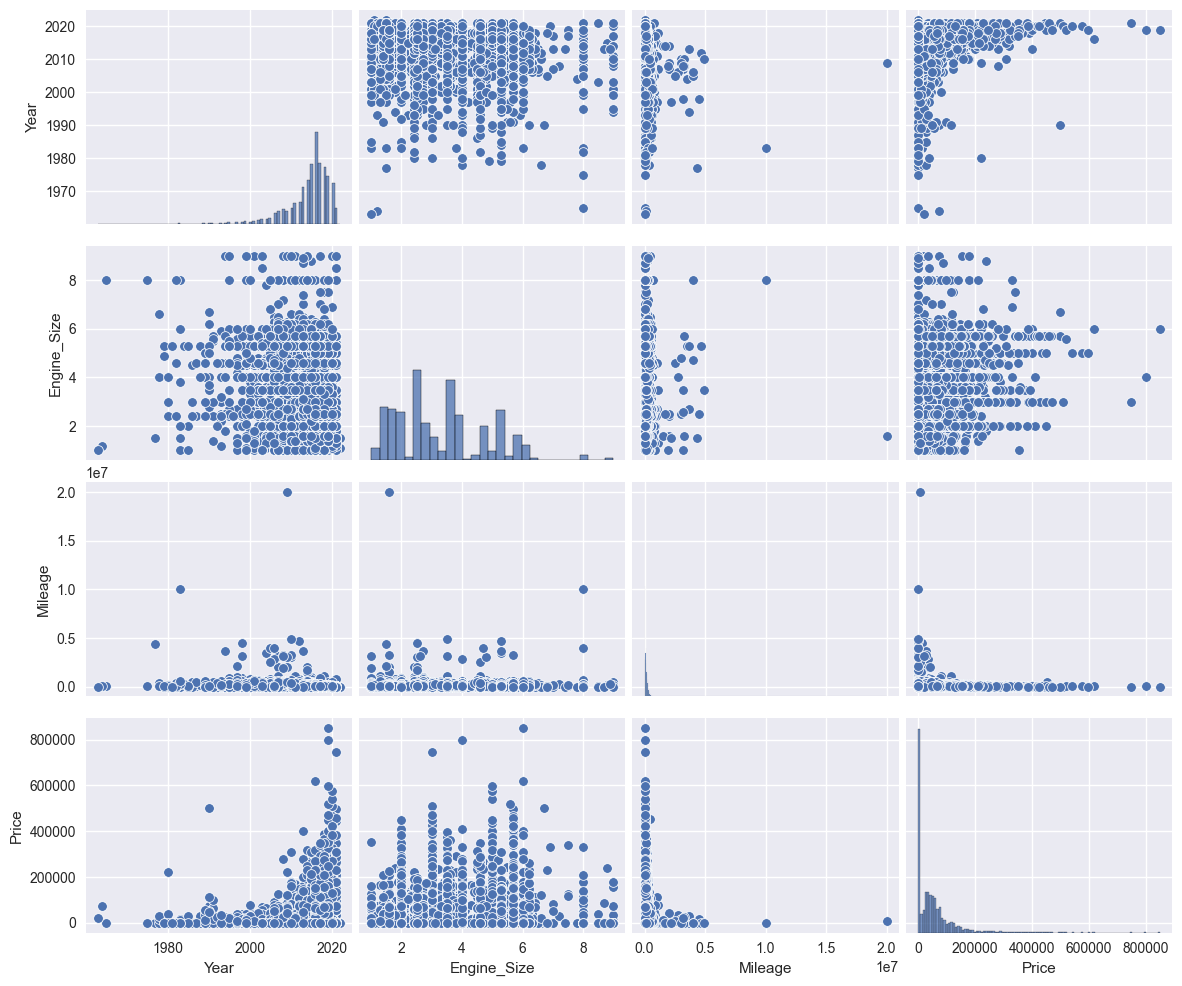

In [ ]:
# Pairplot untuk semua variabel numerik
sns.pairplot(df[['Year','Engine_Size','Mileage','Price']], aspect=1.2)

**Insight** : 

Seperti yang dapat kita lihat dari grafik Pairplot di atas, terdapat korelasi tinggi dan korelasi rendah antara variabel-variabel satu sama lain.
- **Year** : Engine_Size (Korelasi Rendah), Mileage (Korelasi Tinggi), Price (Korelasi Tinggi)
- **Engine_Size** : Year (Korelasi Rendah), Mileage (Korelasi Rendah), Price (Korelasi Rendah)
- **Mileage** : Year (Korelasi Tinggi), Engine_Size (Korelasi Rendah), Price (Korelasi Rendah)
- **Price** : Year (Korelasi Tinggi), Engine_Size (Korelasi Rendah), Mileage (LKorelasi Rendah) 

**Categorical Variabels**

Untuk Variabel Kategorikal, kita akan menganalisis nilai pada setiap kategori untuk eksplorasi dan merangkum kategori itu sendiri. Kita akan membuat urutan peringkat dan menghitung nilainya, sehingga kita dapat melihat perusahaan mobil bekas mana yang paling banyak, tipe mobil bekas yang paling banyak, wilayah mana yang paling tinggi penggunaan mobil bekas, dari mana asal mobil bekas tersebut, dan sebagainya.

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

**1. Distribution of used car price**

c:\Users\Falahyana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


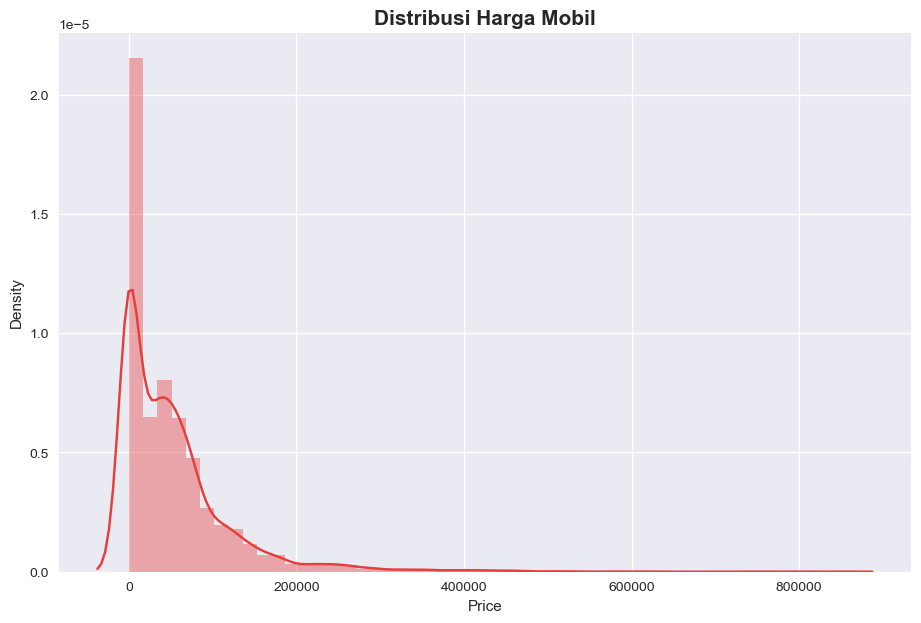

In [116]:
# Plot distribusi fitur 'price'
plt.style.use('seaborn')
plt.figure(figsize = (11,7))
sns.distplot(df['Price'], color="#e83d3d")
plt.title('Distribusi Harga Mobil', size=15, weight='bold');

Gambar diatas menunjukkan bahwa `Price` dari used car memiliki `right-skewed distribution` atau dapat dikatakan positively skewed yang berarti nilai mean > median > mode

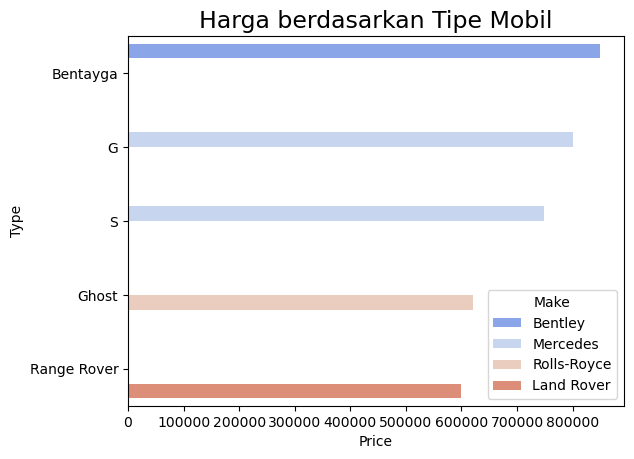

In [115]:
sns.barplot(
    x='Price',
    y='Type',
    hue='Make',
    data=df.nlargest(5, 'Price'),
    palette='coolwarm'
)
plt.title ('Harga berdasarkan Tipe Mobil', size = 17)
plt.show()

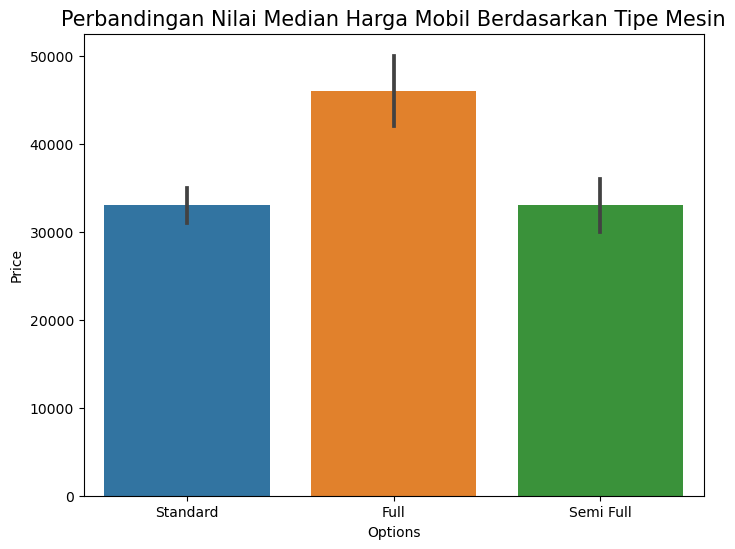

In [114]:
plt.figure(figsize=(8,6))
sns.barplot(x='Options', y='Price', data=df, estimator=np.median)
plt.title('Perbandingan Nilai Median Harga Mobil Berdasarkan Tipe Mesin', size=15)
plt.show()

<Figure size 2500x800 with 0 Axes>

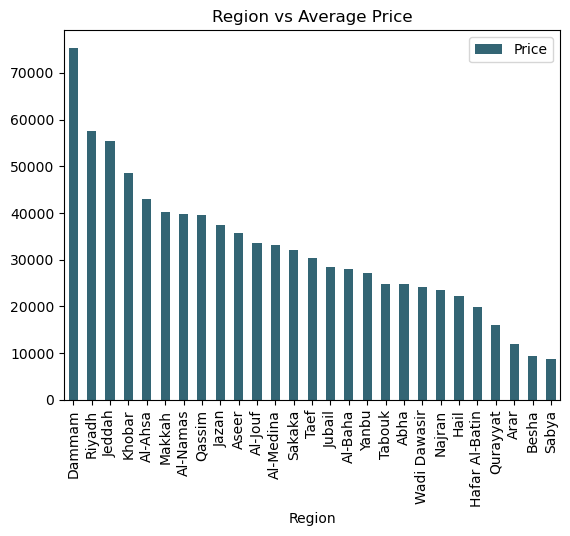

In [113]:
plt.figure(figsize=(25,8))

fig = pd.DataFrame(df.groupby(['Region'])['Price'].mean().sort_values(ascending = False))
fig.plot.bar(color='#336574')
plt.title('Region vs Average Price')
plt.show()

**Top 10 Company of Used Cars & Top 10 Type of Used Cars**

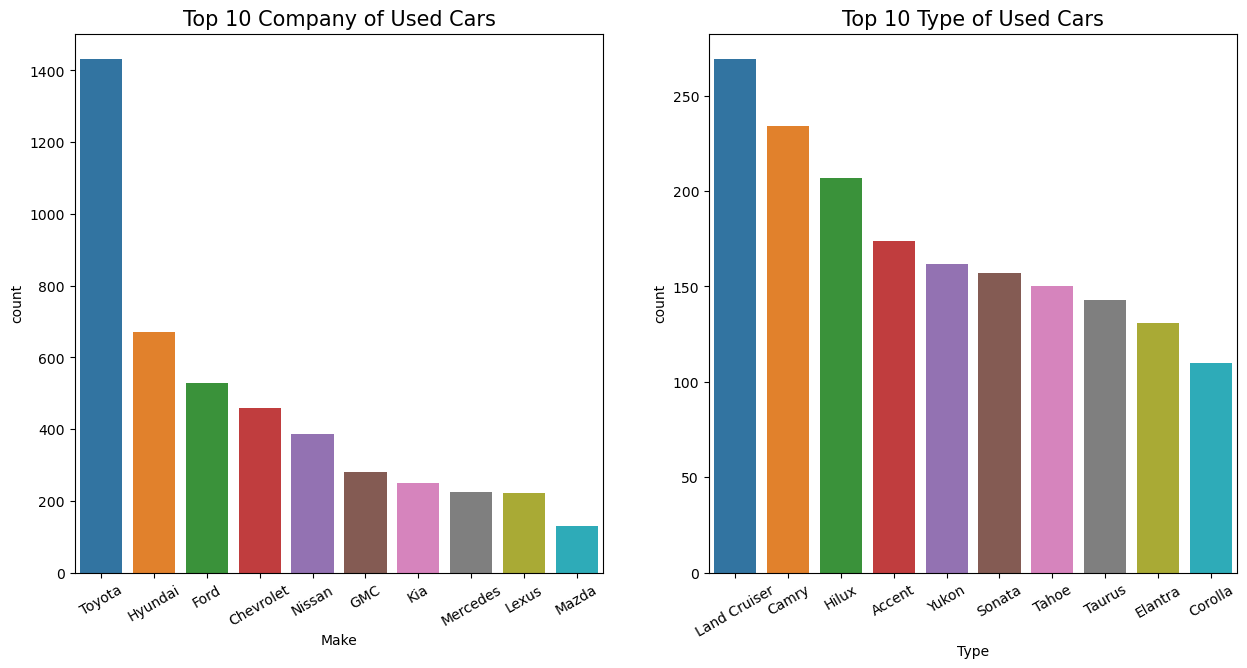

In [112]:
# Tampilkan 10 Perusahaan & Jenis mobil bekas teratas
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Make'], order = df['Make'].value_counts().iloc[:10].index)
plt.title('Top 10 Company of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.subplot(1,2,2)
sns.countplot(x=df['Type'], order = df['Type'].value_counts().iloc[:10].index)
plt.title('Top 10 Type of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.show()

Grafik di atas menunjukkan bahwa Toyota merupakan produsen mobil bekas yang paling banyak dibandingkan dengan perusahaan lainnya. Ini berhubungan dengan 10 Tipe Mobil Bekas Teratas, mayoritas diisi dengan tipe mobil Toyota (Land Cruiser, Camry, Hilux, dan Corolla). Di sisi lain, Hyundai merupakan produsen mobil bekas kedua terbanyak dengan tipe-tipe seperti Accent, Sonata, dan Elantra. Jadi, berdasarkan grafik ini, kita dapat melihat adanya korelasi antara **Categorical Variable**; Merek dan Tipe.

**Top 10 Region of Used Cars & Origin of Used Cars**

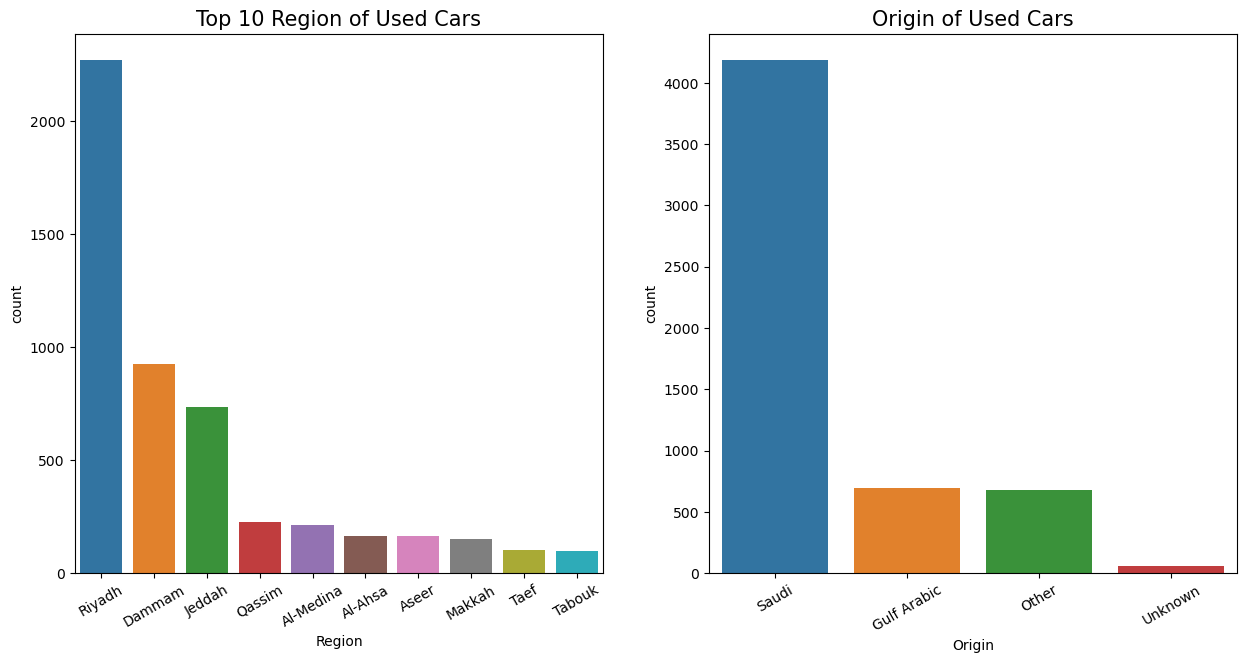

In [111]:
# Tampilkan 10 Perusahaan & Jenis mobil bekas teratas
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Region'], order = df['Region'].value_counts().iloc[:10].index)
plt.title('Top 10 Region of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.subplot(1,2,2)
sns.countplot(x=df['Origin'], order = df['Origin'].value_counts().index)
plt.title('Origin of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.show()

Seperti yang dapat kita lihat, Riyadh adalah wilayah dengan jumlah mobil bekas terbanyak (lebih dari 2000 mobil), sementara Saudi adalah negara asal mobil bekas terbanyak (lebih dari 4000 mobil). Terlihat bahwa grafik ini memiliki korelasi satu sama lain. Namun, mari kita lihat dari sisi lain. Terdapat variabel `Unknown` dan `Other` dalam grafik Asal mobil bekas. Hal ini membuat data kita menjadi redudansi. 

**Type & Amount of Gear Type, Options & Negotiable on Used Cars**

In [110]:
# Periksa type & amount of Gear Type, Options & Negotiable on Used Cars
print(f"Type & Amount of Gear Type on Used Cars :\n{df['Gear_Type'].value_counts()}")
print(f"\nType & Amount of Options on Used Cars :\n{df['Options'].value_counts()}")
print(f"\nType & Amount of Negotiable on Used Cars :\n{df['Negotiable'].value_counts()}")

Type & Amount of Gear Type on Used Cars :
Automatic    4875
Manual        749
Name: Gear_Type, dtype: int64

Type & Amount of Options on Used Cars :
Full         2233
Standard     1822
Semi Full    1569
Name: Options, dtype: int64

Type & Amount of Negotiable on Used Cars :
False    3828
True     1796
Name: Negotiable, dtype: int64


Berdasarkan data di atas, dapat diketahui bahwa:
- Mobil Bekas didominasi oleh Jenis Transmisi Otomatis.
- Terdapat tiga jenis Opsi pada Mobil Bekas, yaitu Full (2233), Standar (1822), dan Semi Full (1569).
- Banyak harga Mobil Bekas yang tidak dapat dinegosiasikan.

---

## **3. Data Preprocessing**

#### 
Tahapan Preprocessing bertujuan untuk mendapatkan data yang sudah bersih dan siap digunakan pada analisa lebih lanjut. Memiliki data yang bersih pada akhirnya akan meningkatkan produktivitas secara keseluruhan dan mempermudah dalam pengambilan keputusan. Adapun beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan handling terhadap missing value(drop value or imputer)
- Melakukan pengecekan pada data duplicate
- Mengubah data type yang masih perlu disesuaikan

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (5624, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [5]:
df_cars = df.copy()
display(df_cars.head(),df_cars.tail())

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000
5623,ES,Jeddah,Lexus,Automatic,Other,Full,2017,3.5,115000,True,0


In [6]:
display(df.describe().round(2), df.describe(include='object'))

,Year,Engine_Size,Mileage,Price
count,5624.00,5624.00,5624.00,5624.00
mean,2014.10,3.30,150923.38,53074.06
std,5.79,1.52,382835.96,70155.34
min,1963.00,1.00,100.00,0.00
25%,2012.00,2.00,38000.00,0.00
50%,2016.00,3.00,103000.00,36500.00
75%,2018.00,4.50,196000.00,72932.50
max,2022.00,9.00,20000000.00,850000.00


,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


In [7]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df_cars.columns :
    listItem.append( [col, df_cars[col].nunique(), df_cars[col].unique()])

df_desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
df_desc

C:\Users\Falahyana\AppData\Local\Temp\ipykernel_13668\4135819921.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
0,Type,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,2,"[Manual, Automatic]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Standard, Full, Semi Full]"
6,Year,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,2,"[True, False]"


####
Secara umum, kita bisa melihat bahwa:
- Dataset Saudi Arabia Used Cars memiliki 11 kolom dan 5.624 baris
- Pada data kolom sebenarnya tidak terdapat NaN. Tetapi jika dilihat lebih lanjut, Pada kolom `Origin` terdapat dengan Nilai Unknown. Unknown tidak dapat diasumsikan NaN dikarenakan pada pengetahuan domain bisnis ini, bisa saja origin mobil tidak diketahui.
- kolom `Negotiable` memberikan informasi apakah mobil tersebut dapat digolongkan pada mobil yang bisa dinegosiasikan atau tidak, karena pada kolom yang berisi True akan menghasilkan nilai Price 0, maka kolom tersebut redundant karena sudah tidak diperlukan atau sudah dapat dijelaskan dengan melihat Price 0. sehingga kolom `Negotiable` bisa dihapus saja.

### **3.1. Handling Missing Value**

In [8]:
df_cars.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

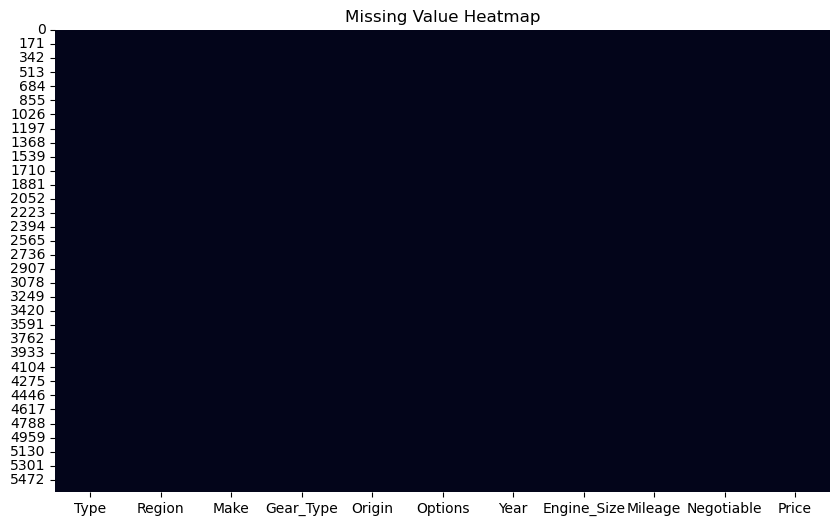

In [9]:
# Membuat missing value heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cars.isnull(), cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

####
Dari informasi yang bisa diambil dari grafik di atas, dapat dilihat bahwa tidak ada missing value pada dataset Saudi Arabia Used Cars. Tetapi, perlu untuk diperhatikan lebih dalam untuk menentukan metode yang paling tepat untuk model.

Perlu dilakukan pengecekan lebih lanjut pada dataset, apakah terdapat data duplikat atau data yang berulang dengan seluruh baris memiliki nilai yang sama. Hal tersebut dapat terjadi dikarenakan adanya salah penginputan data atau metode pengumpulan data. Data duplikat perlu dilakukan pengolahan lebih lanjut karena dapat membuat analisis menjadi overfitting atau menjadi tidak akurat.

#### **Price**

In [10]:
print(f'Jumlah baris dan kolom di dataset df adalah {df_cars.shape}')
df_cars.info()

Jumlah baris dan kolom di dataset df adalah (5624, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [11]:
df_cars = df_cars[df_cars['Price'] != 0]
df_cars.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000


#####
Menghilangkan Price 0, karena pada dataset dapat dilihat ketika mobil dapat dinegosiasikan (negotiable) maka Price akan dijadikan 0. Dihilangkan row pada kondisi tersebut bertujuan untuk melakukan cleaning pada data sebelum membuat model machine learning. Terdapat 1797 baris yang dihilangkan karena memiliki nilai Price sama dengan 0.

In [12]:
print(f'Jumlah baris dan kolom di dataset df adalah {df_cars.shape}')
df_cars.info()

Jumlah baris dan kolom di dataset df adalah (3827, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3827 entries, 1 to 5622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3827 non-null   object 
 1   Region       3827 non-null   object 
 2   Make         3827 non-null   object 
 3   Gear_Type    3827 non-null   object 
 4   Origin       3827 non-null   object 
 5   Options      3827 non-null   object 
 6   Year         3827 non-null   int64  
 7   Engine_Size  3827 non-null   float64
 8   Mileage      3827 non-null   int64  
 9   Negotiable   3827 non-null   bool   
 10  Price        3827 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 332.6+ KB


### **3.2. Dropping Irrelevant Columns**

In [13]:
# Kolom 'Negotiable' tidak diperlukan untuk analisis, sehingga akan dihapuskan
df_cars.drop('Negotiable', axis=1, inplace=True)
df_cars.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


### **3.3. Data Correlation**

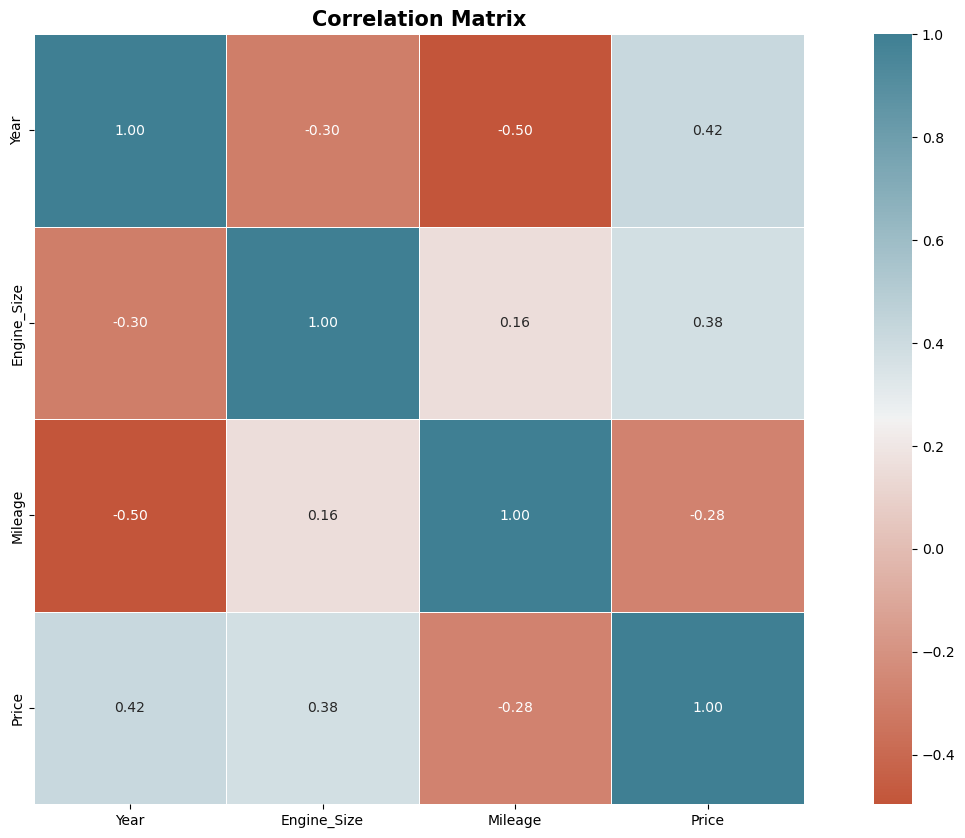

In [14]:
# Correlation matrix
plt.figure(figsize=(18, 10))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_cars.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');


Berdasarkan matriks korelasi, kita dapat menyimpulkan bahwa tidak ada fitur yang memiliki korelasi yang signifikan dengan fitur Price. Korelasi tertinggi terjadi antara fitur Year dengan Price. Secara umum, nilai korelasi cenderung positif, namun pada fitur Mileage, korelasinya negatif atau memiliki arah yang berlawanan.

### **3.4. Outliers**

####
Outliers dapat mempengaruhi performa model prediktif secara signifikan. Jika outliers tidak diatasi, model mungkin akan terpengaruh oleh nilai ekstrem tersebut dan menghasilkan prediksi yang tidak akurat atau tidak stabil. Outliers dapat mempengaruhi parameter dan koefisien model, menggeser titik pusat dan mempengaruhi pembuatan keputusan model.

Outliers dapat mempengaruhi pengambilan keputusan berdasarkan model. Jika outliers tidak diperlakukan dengan benar, keputusan yang diambil berdasarkan model dapat menjadi tidak akurat, tidak masuk akal, atau berpotensi merugikan.

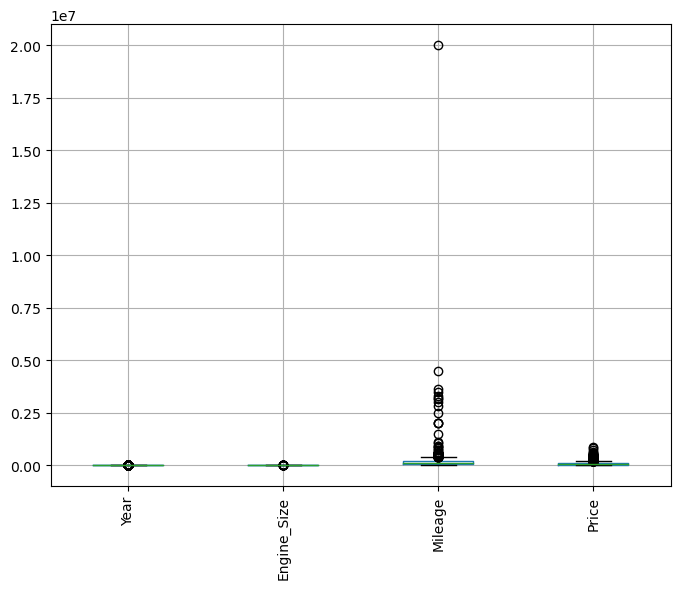

In [15]:
# Cek outliers menggunakan Plot boxplot
plt.figure(figsize = (8,6))
df_cars.boxplot(rot=90);

####
Pada grafik di atas, terlihat adanya outliers pada kolom `Mileage` dan `Price`. Untuk penangan outliers tersebut, akan dilakukan pengolahan data pada beberapa fitur yang mempertimbangkan IQR, Z Score, dan pengetahuan domain berdasarkan bisnis. Dengan demikian, model yang dihasilkan akan memprediksi nilai dengan memperhatikan batasan rentang yang telah ditentukan dalam clean dataset.

#### **IQR**

- ukuran statistik yang digunakan untuk mengukur sebaran data dalam suatu himpunan. IQR menggambarkan rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dalam distribusi data. IQR secara khusus berfokus pada perbedaan antara nilai-nilai data tengah yang berada di tengah-tengah distribusi.
- Outliers dapat didefinisikan sebagai data yang berada di luar batas bawah atau batas atas yang ditentukan oleh IQR. Nilai-nilai yang berada di luar batas ini dianggap sebagai nilai ekstrem atau tidak biasa dalam distribusi data

#### **Z-score**

- Z-score dapat digunakan untuk mengidentifikasi outliers dalam dataset. Nilai Z-score yang melebihi ambang batas tertentu menunjukkan bahwa nilai tersebut berada di luar batas yang diharapkan dari distribusi data. Dengan menggunakan Z-score, dapat secara objektif mengidentifikasi nilai-nilai ekstrem yang mungkin perlu diperhatikan lebih lanjut atau diperlakukan secara khusus dalam analisis.

In [16]:
# Membuat fungsi untuk mengecek outliers
def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

In [17]:
# Membuat fungsi untuk mengecek outliers
def find_outliers_z(column_name):
    df_temp = pd.DataFrame()
    df_temp[column_name] = df_cars[column_name]

    # calculating mean and std
    cars_mean = df_cars[column_name].mean()
    cars_std = df_cars[column_name].std()

    # calculating Z-Score
    df_temp["Z-Score"] = (df_temp[column_name] - cars_mean) / cars_std

    # outliers
    cars_outliers = df_temp[np.abs(df_temp["Z-Score"] > 3)]
    return cars_outliers.groupby(by=column_name)["Z-Score"].median().to_frame()
    

#### **Price**

In [18]:
# Outliers pada price
find_outliers_iqr(df_cars['Price'])

IQR: 59000.0
limit_bawah: -53500.0
limit_atas: 182500.0


In [19]:
df_cars['Price'].describe().round(2)

count    3827.00  
mean     77995.43 
std      72726.71 
min      1.00     
25%      35000.00 
50%      58000.00 
75%      94000.00 
max      850000.00
Name: Price, dtype: float64

In [20]:
# Outliers pada price
find_outliers_z('Price')

,Z-Score
Price,
298000,3.025086
310000,3.190088
315000,3.258838
320000,3.327589
325000,3.396339
330000,3.465090
335000,3.533840
340000,3.602591
342000,3.630091


In [21]:
df_cars[df_cars['Price']>185000]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
17,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,2019,4.6,71000,200000
60,SL,Jeddah,Mercedes,Automatic,Saudi,Full,2017,4.7,81000,265000
73,Land Cruiser,Qassim,Toyota,Automatic,Saudi,Full,2019,4.5,82808,230000
74,GLC,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2020,2.0,4000,225000
...,...,...,...,...,...,...,...,...,...,...
5530,The 7,Jeddah,BMW,Automatic,Saudi,Full,2019,3.0,14000,247000
5548,The M,Riyadh,BMW,Automatic,Saudi,Full,2020,6.0,13000,385000
5555,S8,Dammam,Audi,Automatic,Gulf Arabic,Full,2016,4.0,42000,229000
5573,S,Jeddah,Mercedes,Automatic,Saudi,Semi Full,2015,4.0,157000,215000


In [22]:
df_cars[df_cars['Price']<10000]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
20,Sunny,Riyadh,Nissan,Manual,Saudi,Standard,2011,1.4,290,7000
46,Elantra,Abha,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,27000,1010
62,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0,500000,5500
65,Malibu,Arar,Chevrolet,Automatic,Saudi,Standard,2021,1.5,24000,1200
110,Optra,Riyadh,Chevrolet,Automatic,Saudi,Standard,2007,1.6,2000000,5000
...,...,...,...,...,...,...,...,...,...,...
5521,Suburban,Al-Medina,Chevrolet,Automatic,Other,Semi Full,1997,6.0,292764,4000
5523,Tucson,Makkah,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,58000,1313
5547,Optima,Qassim,Kia,Automatic,Saudi,Standard,2019,2.0,91000,1440
5599,Corolla,Dammam,Toyota,Manual,Other,Standard,1997,1.3,32500,7000


#####
Dalam kolom `Price` dapat dilihat bahwa secara distribusi data, terdapat nilai yang dianggap outliers oleh IQR dan Z-score. Tetapi, jika ditinjau menggunakan pengetahuan domain hal tersebut tidak bisa dianggap sebagai outliers atau masih tergolong wajar dengan tipe dan berbagai fitur lainnya. Dengan mempertimbangkan pemaksimalan model yang akan dibuat maka akan kita lakukan 2 skenario untuk membentuk model, skenario 1 tanpa menghilangkan outliers, sementara skenario 2 dengan menghilangkan outliers

#####
Untuk skenario 2 dimana kita akan melakukan drop terhadap outliers:
- 10000 Riyal < Price < 185000 Riyal
- Secara IQR, batas atas terdapat pada 185000 Riyal untuk menentukan harga mobil yang tidak dikategorikan luxury car

In [23]:
# Melakukan filtering pada data
df_cars_wo_outliers = df_cars[(df_cars['Price'] > 10000) & (df_cars['Price'] < 185000)]

c:\Users\Falahyana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Falahyana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


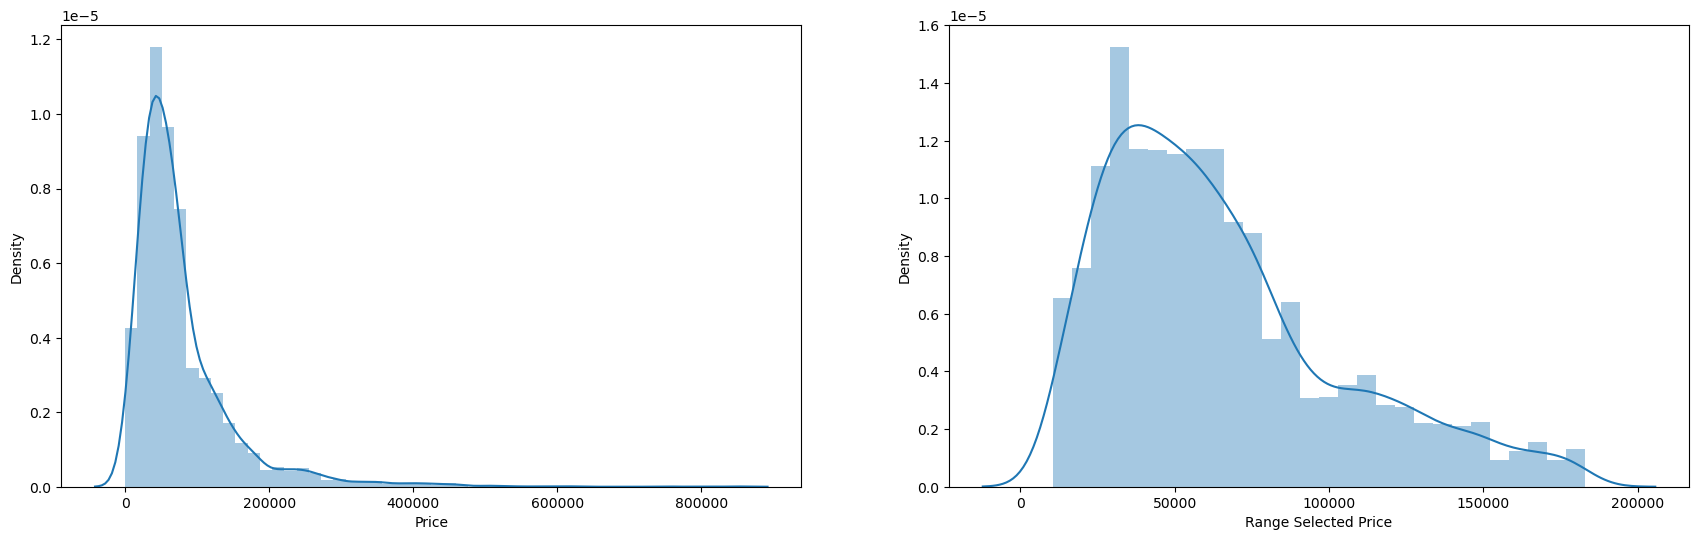

In [24]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df_cars['Price'], ax=axes[0])
sns.distplot(df_cars_wo_outliers['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

#### **Mileage**

In [25]:
# Outliers pada Mileage
find_outliers_iqr(df_cars['Mileage'])

IQR: 135000.0
limit_bawah: -154500.0
limit_atas: 385500.0


In [26]:
df_cars['Mileage'].describe().round(2)

count    3827.00    
mean     142620.38  
std      378258.45  
min      100.00     
25%      48000.00   
50%      103000.00  
75%      183000.00  
max      20000000.00
Name: Mileage, dtype: float64

In [27]:
# Outliers pada Mileage
find_outliers_z('Mileage')

,Z-Score
Mileage,
1500000,3.588498
2000000,4.910345
2002500,4.916955
2013000,4.944713
2500000,6.232193
2800000,7.025301
3000000,7.554040
3150000,7.950595
3180003,8.029913


In [28]:
df_cars[df_cars['Mileage']>400000]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
28,Pathfinder,Al-Ahsa,Nissan,Automatic,Saudi,Semi Full,2002,3.3,550000,10000
62,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0,500000,5500
110,Optra,Riyadh,Chevrolet,Automatic,Saudi,Standard,2007,1.6,2000000,5000
117,Furniture,Taef,Toyota,Manual,Saudi,Standard,2009,2.7,530500,33000
174,Durango,Yanbu,Dodge,Automatic,Saudi,Semi Full,2013,5.7,487100,35000
...,...,...,...,...,...,...,...,...,...,...
5425,Land Cruiser Pickup,Riyadh,Toyota,Manual,Saudi,Standard,2009,4.5,468000,65000
5520,Corolla,Dammam,Toyota,Manual,Saudi,Semi Full,2001,1.3,600000,10000
5554,Camry,Al-Medina,Toyota,Automatic,Saudi,Full,2007,2.5,420000,25000
5595,Land Cruiser,Dammam,Toyota,Manual,Saudi,Standard,2007,4.5,480000,65000


#####
Dalam kolom `Mileage` dapat dilihat bahwa secara distribusi data, terdapat nilai yang dianggap outliers oleh IQR dan Z-score. Tetapi, jika ditinjau menggunakan pengetahuan domain hal tersebut bisa dianggap sebagai outliers atau tidak tergolong wajar seperti pada salah satu data memiliki Mileage 2000000 Miles, angka tersebut hampir sama seperti jarak bumi ke bulan saat bulan berada pada periage. Ada kemungkan bahwa hal tersebut terjadi karena salah memasukkan data atau memang keadaannya seperti itu. Dengan mempertimbangkan pemaksimalan model yang akan dibuat maka akan kita lakukan hal yang sama seperti sebelumnya dengan membuat 2 skenario

#####
Untuk skenario 2 dimana kita akan melakukan drop terhadap outliers:
- Mileage < 385000 Miles
- Secara IQR, limit atas berada pada 385000 Miles

In [29]:
# Melakukan filtering pada data
df_cars_wo_outliers = df_cars_wo_outliers[(df_cars_wo_outliers['Mileage'] < 385500)]

c:\Users\Falahyana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Falahyana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


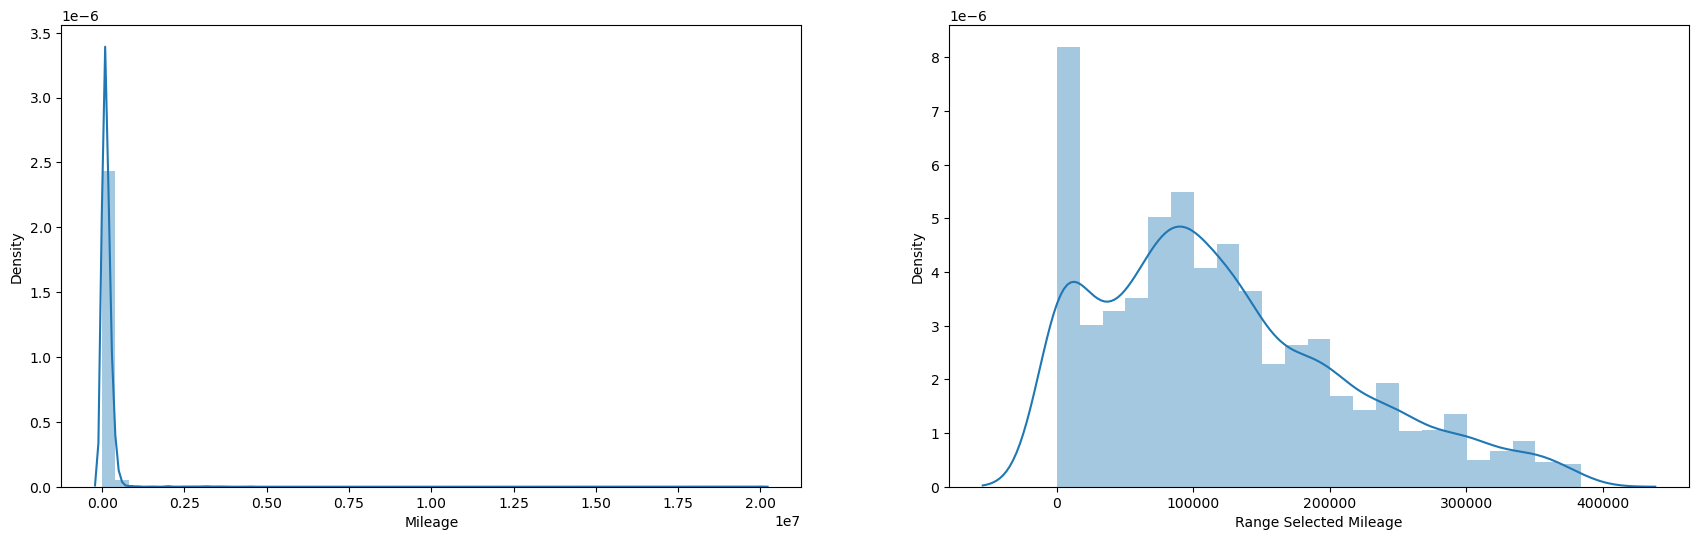

In [30]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df_cars['Mileage'], ax=axes[0])
sns.distplot(df_cars_wo_outliers['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage');

#### **Year**

In [31]:
# Outliers pada Year
find_outliers_iqr(df_cars['Year'])

IQR: 5.0
limit_bawah: 2005.5
limit_atas: 2025.5


In [32]:
# Outliers pada Year
find_outliers_z('Year')

,Z-Score
Year,


In [33]:
df_cars['Year'].describe().round(2)

count    3827.00
mean     2014.85
std      5.11   
min      1963.00
25%      2013.00
50%      2016.00
75%      2018.00
max      2021.00
Name: Year, dtype: float64

In [34]:
df_cars[df_cars['Year']<2000]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
62,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0,500000,5500
86,Suburban,Al-Medina,Chevrolet,Automatic,Other,Full,1999,5.3,70000,20000
182,Suburban,Riyadh,GMC,Automatic,Saudi,Semi Full,1995,5.3,215000,13000
290,S,Al-Jouf,Mercedes,Automatic,Other,Full,1993,3.0,138,22000
306,Land Cruiser Pickup,Aseer,Toyota,Manual,Saudi,Standard,1983,1.5,2580,15000
...,...,...,...,...,...,...,...,...,...,...
5462,Datsun,Riyadh,Nissan,Manual,Saudi,Standard,1989,2.4,249,11000
5477,Fleetwood,Al-Ahsa,Cadillac,Automatic,Other,Full,1990,5.0,109000,48000
5521,Suburban,Al-Medina,Chevrolet,Automatic,Other,Semi Full,1997,6.0,292764,4000
5537,Savana,Jeddah,GMC,Automatic,Other,Full,1999,1.5,200000,11500


#####
Dalam kolom `Year` dapat dilihat bahwa secara distribusi data, terdapat nilai yang dianggap outliers oleh IQR tetapi tidak sama dengan Z-score yang tidak menghasilkan data nilai yang dianggap outliers. Oleh karena itu, jika ditinjau menggunakan pengetahuan domain hal tersebut tidak perlu dianggap sebagai outliers atau masih tergolong wajar dengan tipe dan berbagai fitur lainnya.

#####
Untuk skenario 2 dimana kita akan melakukan drop terhadap outliers:
- Tahun 2000 < Year
- Secara IQR, batas atas terdapat pada Tahun 2005, tetapi secara pengetahuan domain bisa dikategorikan perusahaan tidak menjual mobil klasik dibawah tahun 2000.

In [35]:
# Melakukan filtering pada data
df_cars_wo_outliers = df_cars_wo_outliers[(df_cars_wo_outliers['Year'] > 2000)]

c:\Users\Falahyana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Falahyana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


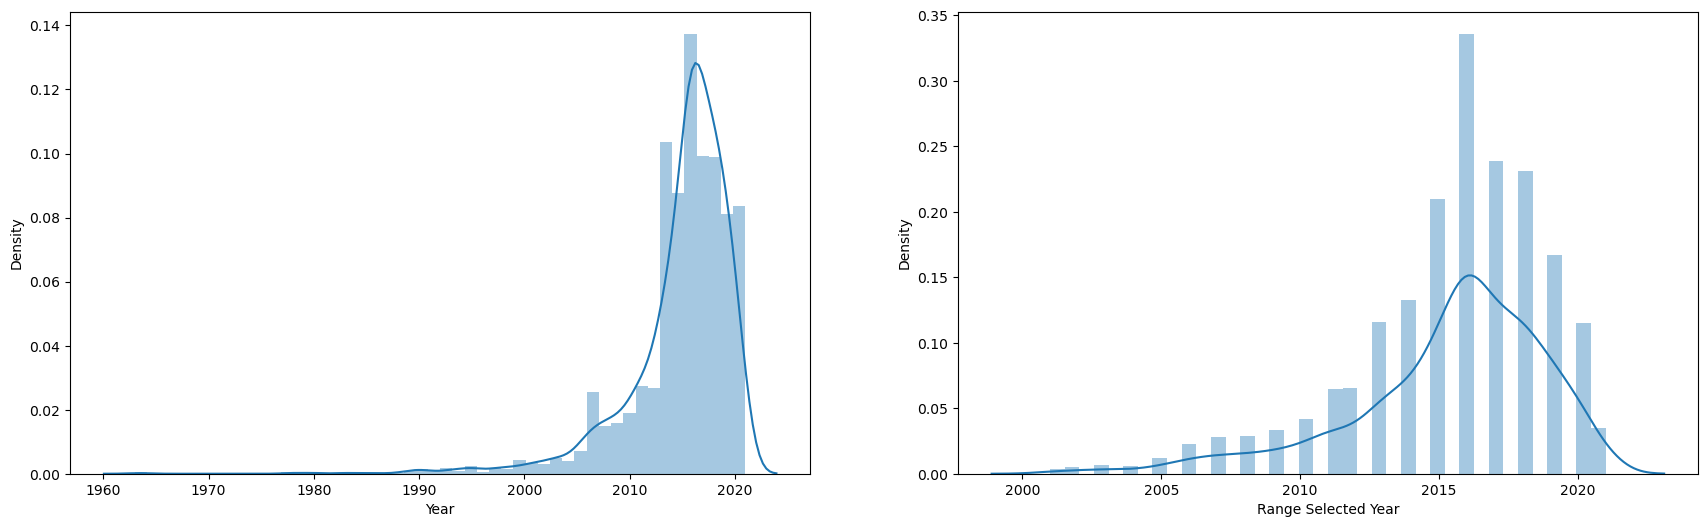

In [36]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df_cars['Year'], ax=axes[0])
sns.distplot(df_cars_wo_outliers['Year'], ax=axes[1])
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Range Selected Year');

In [37]:
print(f'Jumlah baris dan kolom di dataset df adalah {df_cars.shape}')
df_cars.info()

Jumlah baris dan kolom di dataset df adalah (3827, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3827 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3827 non-null   object 
 1   Region       3827 non-null   object 
 2   Make         3827 non-null   object 
 3   Gear_Type    3827 non-null   object 
 4   Origin       3827 non-null   object 
 5   Options      3827 non-null   object 
 6   Year         3827 non-null   int64  
 7   Engine_Size  3827 non-null   float64
 8   Mileage      3827 non-null   int64  
 9   Price        3827 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 328.9+ KB


In [38]:
print(f'Jumlah baris dan kolom di dataset df adalah {df_cars_wo_outliers.shape}')
df_cars_wo_outliers.info()

Jumlah baris dan kolom di dataset df adalah (3276, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3276 non-null   object 
 1   Region       3276 non-null   object 
 2   Make         3276 non-null   object 
 3   Gear_Type    3276 non-null   object 
 4   Origin       3276 non-null   object 
 5   Options      3276 non-null   object 
 6   Year         3276 non-null   int64  
 7   Engine_Size  3276 non-null   float64
 8   Mileage      3276 non-null   int64  
 9   Price        3276 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 281.5+ KB


####
Proses preprocessing data dibagi menjadi 2 skenario, pada skenario sesuai dengan asumsi dan argumen yang diberikan pada handling price yang memiliki nilai 0 atau kolom `negotiable` bernilai True. 
Pada kedua skenario memiliki jummlah baris yang berbeda:
- Skenario 1: pengurangan sebanyak 32% data menjadi 3827 baris data dan 10 kolom yang akan digunakan dalam membuat model.
- Skenario 2: pengurangan sebanyak 40% data menjadi 3414 baris data dan 10 kolom yang akan digunakan dalam membuat model.



---

## **4. Modeling**

**Encoding**

Berdasarkan data yang tersedia, terdapat 6 variabel kategorikal. Jika kita ingin menggunakan seluruh fitur tersebut, kita perlu melakukan encoding. Pemilihan metode encoding dapat didasarkan pada skala pengukuran data, apakah nominal (numerik) atau ordinal (memiliki urutan tertentu saat diurutkan). Pada tahap ini, kita akan melakukan encoding sebagai berikut:

1. One-Hot Encoding: untuk variabel Gear_Type, Origin, dan Options.
2. Binary Encoding: untuk variabel Type, Region, dan Make.

Kita dapat menggunakan ColumnTransformer untuk mengubah tipe data variabel-variabel tersebut, sehingga nantinya dapat diaplikasikan dalam pipeline model.

In [39]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('Binary', BinaryEncoder(), ['Type', 'Region', 'Make'])
], remainder='passthrough')

**Modeling**
Modeling yang akan kita lakukan terbagi menjadi 2 skenario, skenario 1 data yang digunakan menggunakan outliers, sedangkan skenario 2 data yang digunakan sudah tidak menggunakan outliers. Sehingga, kita dapat melakukan evaluasi terdapat kedua skenario tersebut dan menentukan model yang lebih baik untuk dilanjutkan melakukan predict terhadap test-set

Pada tahap ini kita akan melakukan data transformation (scaling) dan cross validation terhadap train-set untuk menentukan benchmark model. Benchmark model tersebut nanti kita akan tuning dengan tujuan meningkatkan performa dari model tersebut. Setelah menentukan benchmark model kita akan melakukan hyperparameter tuning pada model tersebut.

Kita akan menggunakan beberapa metrics untuk mengevaluasi model kita:
- R2 (R-Squared)
    - R2 hanya bisa digunakan pada model regresi linear. Metric ini mengukur seberapa baik model dalam menangkap pola dari target untuk melakukan prediksi
    - R2 memiliki rentang nilai antara 0 - 1. Semakin mendekati 1 artinya model semakin baik dalam membaca pola dan memprediksi target 
- RMSE (Root Mean Squared Error)
    - Metric ini mengukur tingkat kesalahan prediksi dengan cara menghitung akar dari rata-rata kuadrat selisih antara nilai prediksi dengan nilai sebenarnya. Metric ini lebih sensitif terhadap outlier karena dalam formulanya terdapat kuadrat. Hal ini menyebabkan semakin tinggi outlier maka outlier itu akan semakin mempengaruhi masil metric 
- MAE (Mean Absolute Error)
    - Metric ini mirip dengan RMSE, perbedaan terbesarnya adalah MAE nilainya di-absolutkan, sedangkan RMSE menggunakan akar dari rata-rata kuadrat. Metric ini lebih tidak sensitif terhadap outlier dibandingkan RMSE. Hal ini disebabkan karena pada formulanya nilai di-absolutkan sedangkan pada RMSE nilai dikuadratkan
- MAPE (Mean Absolute Percentage Error)
    - Meric ini mengukur rata-rata persentase kesalahan error antara nilai prediksi dan nilai sebenarnya. Metric ini biasa digunakan untuk interpretasi hasil dari model, karena output dari metric ini berupa persentase error dari model

Nilai RMSE, MAE, MAPE semakin kecil semakin baik, karena semakin kecil nilai metric ini menandakan error dari model semakin kecil. Kita juga akan mengevaluasi nilai mean dan std dari setiap metric untuk mengevaluasi performa model. Mean memberikan gambaran tentang nilai rata-rata kesalahan prediksi yang dihasilkan oleh model, sementara std mengindikasikan sejauh mana nilai kesalahan prediksi tersebar dari nilai mean.

Dengan melihat nilai mean dan std, kita dapat mendapatkan informasi tentang seberapa konsisten dan akurat model dalam melakukan prediksi. Semakin kecil nilai mean dan std, semakin baik model dalam melakukan prediksi yang konsisten dan akurat.

**Data Splitting**

Pemisahan (splitting) data menjadi set pelatihan (train-set) dan set pengujian (test-set) adalah praktik umum dalam pemodelan statistik dan pembelajaran mesin. Namun, tidak ada persentase yang "paling baik" yang berlaku secara universal untuk semua kasus. Pemilihan persentase tergantung pada faktor-faktor berikut:

- Ukuran dataset: Jika dataset besar, mungkin memiliki fleksibilitas untuk menggunakan proporsi yang lebih kecil untuk set pengujian, misalnya 80% untuk pelatihan dan 20% untuk pengujian. Namun, pada dataset yang lebih kecil, mungkin diperlukan set pengujian yang lebih besar untuk evaluasi yang lebih andal.

- Keterbatasan data: Jika memiliki jumlah data yang terbatas, mungkin perlu mempertimbangkan membagi data dengan proporsi yang lebih rendah untuk set pengujian agar memiliki cukup sampel untuk diuji.

- Tingkat ketelitian yang diinginkan: Jika menginginkan estimasi yang lebih akurat tentang kinerja model, set pengujian yang lebih besar diperlukan. Hal ini memberikan lebih banyak data independen yang tidak digunakan dalam pelatihan untuk menguji model secara lebih andal.

Secara umum, pemisahan 70:30 atau 80:20 untuk set pelatihan dan pengujian adalah pilihan umum yang dapat digunakan sebagai titik awal. Namun, penting untuk mengevaluasi kembali dan melakukan validasi silang (cross-validation) pada model untuk memastikan kinerjanya secara konsisten di berbagai partisi data. Ini membantu mengurangi bias dari evaluasi yang dilakukan hanya pada satu partisi data tertentu.

Pada modeling kali ini, pemisahan dilakukan sebesar 70:30, dengan 70 train-set dan 30 test-set

### **4.1. Skenario 1(tanpa membuang outliers)**

#### **4.1.1 Define X and y**

In [40]:
X= df_cars.drop(['Price'],axis=1)
y= df_cars['Price']

#### **4.1.2. Data Splitting**

In [41]:
# Splitting data into training and test with propotion 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=0)

#### **4.1.3. Cross Validation**

In [42]:
pd.reset_option('display.max_colwidth')

In [43]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
adb = AdaBoostRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_adb = TransformedTargetRegressor(adb, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_adb, log_gb, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-51548.26563145 -39817.73695421 -62271.00489279 -46908.57553105
 -47038.56670264] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-28381.62824882 -23636.26718979 -29422.06295876 -26607.74506234
 -27658.35125108] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-181.24692487   -1.30314663   -0.85657079   -0.83712916   -0.77790073] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-43500.32432635 -41249.9871958  -64913.11969738 -45877.89493994
 -44080.24176842] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-26175.01717087 -24988.01072187 -31301.06575143 -27686.42505617
 -26010.45258113] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufun

[-93.4212035   -1.41107222  -1.03125104  -0.86956053  -0.79825018] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-58848.29987503 -46077.85637062 -61930.95696562 -54815.23957208
 -51512.88150928] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=0))
[-28206.92145117 -26284.0368294  -27204.67723881 -26520.55615447
 -25531.43364486] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=0))
[-327.55764292   -1.42051188   -0.96765746   -0.87671597   -0.90864823] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=0))
[-37389.7646285  -32378.2545583  -56993.01450611 -39372.22318149
 -36512.04173116] TransformedTargetRegress

In [44]:
# Evaluasi hasil dari 7 kandidat algoritma yang digunakan
df_cv= pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'AdaBoost Regressor', 'Gradient Boosting Regressor','XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

df_cv = df_cv.sort_values(by='Mean_RMSE', ascending=False)
df_cv

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
6,XGBoost Regressor,-38143.048762,8176.489693,-19575.998788,1847.548203,-64.036978,126.469555
3,RandomForest Regressor,-40529.059721,8541.982322,-19218.735529,1295.634414,-63.109431,124.613127
5,Gradient Boosting Regressor,-42519.896789,7525.915977,-21690.610495,1679.674692,-59.276711,116.895466
1,KNN Regressor,-47924.313586,8622.094458,-27232.194256,2209.464945,-19.506267,36.958076
0,Linear Regression,-49516.829942,7400.174244,-27141.210942,1978.765861,-37.004334,72.121539
2,DecisionTree Regressor,-54637.046859,5549.552778,-26749.525064,903.772150,-66.346235,130.605852
4,AdaBoost Regressor,-74816.811228,8227.988835,-46613.135357,4706.991388,-20.033137,38.445567


**Hasil cross validation:**

Karena model terbaik bukan LinearRegression kita akan mengabaikan metric r2. Berdasarkan nilai Mean_MAPE, model XGBRegressor dan RandomForestRegressor mempunyai performa yang sangat baik dimana kedua model ini memiliki persentase error yang kecil dibandingkan model lain. Perbedaan terbesar dari kedua model ini adalah pada nilai Mean dan Std pada metric RMSE dan MAE. Berdasarkan Mean, XGBRegressor memiliki nilai error yang lebih kecil, namun jika kita lihat berdasarkan std, model RandomForest dominan memiliki tingkat kestabilan yang lebih baik, dimana nilai std-nya yang lebih kecil.

Kesimpulan:
- Model XGBRegressor memiliki nilai Mean Error yang lebih kecil
- Model RandomForestRegressor memiliki nilai std yang lebih kecil

Terdapat perbedaan yang cukup signifikan antara nilai Mean_RMSE dan Mean_MAE, hal ini disebabkan karena Nilai RMSE lebih sensitif terhadap outlier. Oleh karena itu kita akan melanjutkan percobaan terhadap kedua algoritma tersebut untuk melihat model terbaik.

In [45]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=0),
    'RandomForest': RandomForestRegressor(random_state=0)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,35170.974886,18528.834864,1.123582
RandomForest,37361.798172,18873.120418,1.190668


Dari hasil di atas, dapat dilihat bahwa algoritma yang akan digunakan untuk hyperparameter tuning adalah XGBRegressor

#### **4.1.4. Hyperparameter Tuning**

**XGBRegressor**

XGBRegressor adalah algoritma pemodelan yang merupakan implementasi dari metode Boosting Tree yang dikenal sebagai Extreme Gradient Boosting (XGBoost). Ini adalah salah satu algoritma yang populer dan kuat untuk masalah regresi. XGBRegressor bekerja dengan menggabungkan sekumpulan pohon keputusan sederhana yang disebut "weak learners" menjadi model yang kuat.

Berikut adalah cara kerja XGBRegressor:

- Inisialisasi Model: Pertama, model XGBRegressor diinisialisasi dengan parameter-parameter yang diberikan. Ini termasuk parameter seperti learning rate, jumlah pohon (n_estimators), kedalaman maksimum pohon (max_depth), dan banyak parameter lainnya yang mempengaruhi perilaku model.

- Pembentukan Pohon: XGBRegressor memulai dengan pohon keputusan sederhana (weak learner) yang memiliki kedalaman terbatas. Pohon ini membagi data latih berdasarkan aturan yang meminimalkan kerugian (loss) yang ditentukan, seperti Mean Squared Error (MSE) atau Mean Absolute Error (MAE).

- Pengurangan Kesalahan (Error Reduction): Setelah pohon pertama dibangun, model melihat kesalahan atau residu dari prediksi pohon pertama terhadap target aktual. Model kemudian membangun pohon berikutnya dengan tujuan mengurangi kesalahan ini. Pohon berikutnya dibangun berdasarkan residu yang tersisa. Proses ini berlanjut dengan menambahkan pohon secara berurutan untuk mengurangi kesalahan secara bertahap.

- Regularisasi: XGBRegressor memiliki beberapa teknik regularisasi untuk mencegah overfitting dan meningkatkan umumnya kinerja model. Ini termasuk penggunaan parameter seperti learning rate (shrinkage), regularization terms seperti L1 (lasso) dan L2 (ridge) regularization, dan penalti untuk kedalaman pohon yang berlebihan.

- Prediksi: Setelah semua pohon ditambahkan ke model, prediksi dilakukan dengan menjumlahkan hasil prediksi dari setiap pohon. Output akhir adalah prediksi regresi dari XGBRegressor.

- Evaluasi: Model XGBRegressor dapat dievaluasi menggunakan metrik evaluasi regresi seperti Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), atau koefisien determinasi (R-squared).

- Tuning Hyperparameter: Untuk mendapatkan kinerja model yang optimal, hyperparameter XGBRegressor dapat dituning dengan menggunakan metode seperti grid search atau randomized search. Hal ini melibatkan mencoba berbagai kombinasi parameter dan memilih yang memberikan kinerja terbaik.

XGBRegressor memiliki banyak keunggulan, termasuk kemampuannya untuk menangani dataset yang besar, toleransi terhadap data yang hilang atau hilang, kemampuan menangani fitur numerik dan kategorikal, serta kemampuan untuk mengekstraksi fitur penting dari data.

Penting untuk dicatat bahwa ini adalah gambaran umum tentang cara kerja XGBRegressor. Ada banyak aspek dan detail lain yang terlibat dalam implementasi algoritma ini, termasuk teknik pengoptimalan dan strategi yang kompleks yang digunakan untuk meningkatkan kinerja dan kestabilan model.

In [46]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate (Penyusutan ukuran langkah digunakan dalam pembaruan untuk mencegah overfitting)
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

Berikut adalah penjelasan tentang parameter-parameter yang umumnya digunakan dalam XGBRegressor:

- max_depth:
Parameter ini mengontrol kedalaman maksimum setiap pohon dalam ensemble. Nilai yang lebih tinggi dapat menghasilkan model yang lebih kompleks, tetapi juga berisiko overfitting. Secara umum, pemilihan nilai antara 3 dan 10 dapat memberikan hasil yang baik. Nilai defaultnya adalah 6.

- learning_rate:
Parameter ini mengatur tingkat pembelajaran atau kontribusi dari setiap pohon dalam ensemble. Nilai yang lebih kecil memerlukan lebih banyak pohon untuk membangun model yang kuat, tetapi juga dapat membantu menghindari overfitting. Sebaliknya, nilai yang lebih besar dapat menyebabkan overfitting. Menurunkan learning rate sambil meningkatkan jumlah pohon dapat meningkatkan akurasi model. Nilai defaultnya adalah 0.3.

- n_estimators:
Parameter ini menentukan jumlah total pohon dalam ensemble atau jumlah iterasi yang dilakukan. Semakin banyak pohon, semakin kuat modelnya, tetapi membutuhkan waktu lebih lama untuk melatih model. Jika nilai n_estimators terlalu rendah, model mungkin tidak memiliki kompleksitas yang cukup untuk mempelajari pola dalam data. Jika terlalu tinggi, itu bisa menyebabkan overfitting. Nilai defaultnya adalah 100.

- subsample:
Parameter ini mengontrol fraksi dari data pelatihan yang digunakan untuk melatih setiap pohon. Nilai subsample yang lebih kecil menghasilkan pengambilan sampel acak yang lebih sedikit dari data, yang dapat membantu mengurangi varians tetapi pada saat yang sama dapat menyebabkan bias. Nilai antara 0.5 dan 1.0 umumnya digunakan. Nilai defaultnya adalah 1.0.

- gamma:
Parameter ini mengontrol ketebalan minimum yang diperlukan untuk melakukan pemisahan pada simpul pohon. Nilai gamma yang lebih tinggi menghasilkan pemisahan yang lebih konservatif, yang dapat membantu mencegah overfitting. Nilai defaultnya adalah 0.

- colsample_bytree:
Parameter ini mengontrol fraksi dari fitur yang digunakan untuk melatih setiap pohon. Nilai yang lebih kecil menghasilkan pengambilan sampel acak yang lebih sedikit dari fitur, yang dapat membantu mengurangi varians tetapi pada saat yang sama dapat menyebabkan bias. Nilai antara 0.5 dan 1.0 umumnya digunakan. Nilai defaultnya adalah 1.0.

- reg_alpha:
Parameter ini adalah regularisasi L1 pada bobot daun pohon. Ini membantu mengontrol kompleksitas model dan mengurangi overfitting. Jika nilai reg_alpha terlalu tinggi, itu dapat menyebabkan penalti yang berlebihan pada bobot, yang dapat mengurangi kinerja model. Nilai defaultnya adalah 0.

In [47]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=0, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 300,
    cv = 5, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0
)

In [48]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           cols...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [49]:
pd.set_option('display.max_columns', None)

In [50]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
64,1.378348,0.025604,0.027129,0.001595,0.4,0.059948,187,9,0.07,9,0.6,"{'model__subsample': 0.4, 'model__reg_alpha': ...",-32270.606115,-29475.320566,-50748.503843,-31582.778340,-28656.357072,-34546.713187,8208.275238,1,-18446.842106,-16370.399768,-19408.161976,-17222.768410,-16677.633023,-17625.161056,1139.158210,5,-241.293162,-1.502366,-0.809092,-0.914835,-0.765293,-49.056950,96.118471,90
75,1.151135,0.016915,0.023138,0.000399,0.9,1.29155,151,7,0.04,3,0.9,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-32033.308226,-30399.907589,-51061.769661,-32540.928296,-27522.915187,-34711.765792,8360.394621,2,-17528.290227,-16485.560372,-19344.165784,-17106.397070,-15683.488851,-17229.580461,1226.363561,1,-330.822354,-1.485139,-0.811999,-0.963964,-0.781125,-66.972916,131.924961,222
130,0.948985,0.006995,0.024836,0.000491,0.8,0.001,179,7,0.07,10,0.5,"{'model__subsample': 0.8, 'model__reg_alpha': ...",-32505.899228,-29316.004126,-50744.074482,-33155.638085,-28210.162042,-34786.355593,8193.650954,3,-17687.800427,-16012.643159,-19799.007278,-17331.265079,-16826.173544,-17531.377898,1265.742829,4,-277.269536,-1.499371,-0.786598,-0.856499,-0.777255,-56.237852,110.516171,133
110,0.721842,0.010411,0.022542,0.000799,0.8,0.002783,116,6,0.06,1,0.8,"{'model__subsample': 0.8, 'model__reg_alpha': ...",-32322.938316,-30284.647935,-51662.790186,-32184.214361,-27761.908646,-34843.299889,8570.246458,4,-17808.755683,-16695.598038,-19310.457230,-17376.585934,-16124.407182,-17463.160813,1088.195660,2,-329.055741,-1.583851,-0.763166,-1.036699,-0.768241,-66.641540,131.207441,221
51,2.025529,0.096771,0.032116,0.003958,0.7,3.593814,178,10,0.16,4,0.7,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-32543.905150,-31202.077768,-49999.694807,-33763.400161,-27855.835473,-35072.982672,7719.962346,5,-18041.711466,-17229.699101,-19408.275770,-18121.443122,-16185.958113,-17797.417514,1065.705592,7,-313.643489,-1.480175,-0.826191,-1.028344,-0.748700,-63.545380,125.049313,197
270,1.892199,0.415878,0.040003,0.016886,0.8,10.0,191,8,0.17,7,0.6,"{'model__subsample': 0.8, 'model__reg_alpha': ...",-32219.475874,-30761.916286,-51164.799192,-33718.328274,-27607.293917,-35094.362709,8285.453095,6,-18254.233282,-16563.583316,-20119.734900,-17860.104709,-16553.622945,-17870.255830,1315.189190,8,-318.956999,-1.445969,-0.825266,-1.088813,-0.685134,-64.600436,127.178545,208
224,0.997651,0.006478,0.025539,0.002742,0.9,3.593814,186,6,0.2,7,0.7,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-32593.719244,-32498.936376,-51162.357918,-33170.419598,-26834.750003,-35252.036628,8282.129913,7,-17867.483946,-17939.684227,-19447.571490,-17921.070548,-16869.165741,-18008.995191,824.775500,9,-296.228313,-1.575427,-0.818870,-0.997455,-0.712124,-60.066438,118.081314,173
211,0.923383,0.009739,0.024337,0.001017,0

In [51]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -34546.71318712896
Best_params: {'model__subsample': 0.4, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 187, 'model__max_depth': 9, 'model__learning_rate': 0.07, 'model__gamma': 9, 'model__colsample_bytree': 0.6}


In [52]:
# Kedalaman pohon
max_depth = list(np.arange(6, 10))

# Learning rate (Penyusutan ukuran langkah digunakan dalam pembaruan untuk mencegah overfitting)
learning_rate = list(np.arange(6, 11)/100)

# Jumlah pohon
n_estimators = list(np.arange(160, 201,10))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(6, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11, 4)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(6, 9)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [53]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=0, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

# Hyperparameter tuning
grid_xgb = GridSearchCV(
    estimator_xgb, 
    param_grid = hyperparam_space_xgb,
    cv = 5, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
)

In [54]:
# Fitting data training untuk mencari parameter terbaik
grid_xgb.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(grid_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__colsample_bytree,param_model__gamma,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__reg_alpha,param_model__subsample,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
4467,1.996462,0.178994,0.035109,0.005008,0.7,3,0.07,9,190,10.0,0.7,"{'model__colsample_bytree': 0.7, 'model__gamma': 3, 'model__learning_rate': 0.07, 'model__max_depth': 9, 'model__n_estimators': 190, 'model__reg_alpha': 10.0, 'model__subsample': 0.7}",-31541.033101,-29348.766162,-49836.026299,-31989.272017,-26736.764875,-33890.372491,8187.768242,1,-17359.185889,-15857.891402,-18615.650259,-17079.071373,-15616.421513,-16905.644087,1088.097315,461,-287.542366,-1.440304,-0.780166,-0.939923,-0.755297,-58.291611,114.625642,2744
5547,1.837589,0.040935,0.030291,0.002658,0.7,7,0.07,9,190,10.0,0.7,"{'model__colsample_bytree': 0.7, 'model__gamma': 7, 'model__learning_rate': 0.07, 'model__max_depth': 9, 'model__n_estimators': 190, 'model__reg_alpha': 10.0, 'model__subsample': 0.7}",-31541.033101,-29348.766162,-49836.026299,-31989.272017,-26736.764875,-33890.372491,8187.768242,1,-17359.185889,-15857.891402,-18615.650259,-17079.071373,-15616.421513,-16905.644087,1088.097315,461,-287.542366,-1.440304,-0.780166,-0.939923,-0.755297,-58.291611,114.625642,2744
4437,1.900395,0.103676,0.036308,0.004835,0.7,3,0.07,9,180,10.0,0.7,"{'model__colsample_bytree': 0.7, 'model__gamma': 3, 'model__learning_rate': 0.07, 'model__max_depth': 9, 'model__n_estimators': 180, 'model__reg_alpha': 10.0, 'model__subsample': 0.7}",-31559.102336,-29333.903816,-49843.466920,-31972.705649,-26756.091183,-33893.053981,8188.685232,3,-17371.156022,-15843.289716,-18623.107615,-17051.817837,-15632.937519,-16904.461742,1089.598176,455,-286.484187,-1.438063,-0.777991,-0.939433,-0.755746,-58.079084,114.202816,2573
5517,1.818756,0.037521,0.030900,0.002643,0.7,7,0.07,9,180,10.0,0.7,"{'model__colsample_bytree': 0.7, 'model__gamma': 7, 'model__learning_rate': 0.07, 'model__max_depth': 9, 'model__n_estimators': 180, 'model__reg_alpha': 10.0, 'model__subsample': 0.7}",-31559.102336,-29333.903816,-49843.466920,-31972.705649,-26756.091183,-33893.053981,8188.685232,3,-17371.156022,-15843.289716,-18623.107615,-17051.817837,-15632.937519,-16904.461742,1089.598176,455,-286.484187,-1.438063,-0.777991,-0.939433,-0.755746,-58.079084,114.202816,2573
4497,2.054883,0.123352,0.029087,0.001280,0.7,3,0.07,9,200,10.0,0.7,"{'model__colsample_bytree': 0.7, 'model__gamma': 3, 'model__learning_rate': 0.07, 'model__max_depth': 9, 'model__n_estimators': 200, 'model__reg_alpha': 10.0, 'model__subsample': 0.7}",-31554.457383,-29359.988257,-49819.860746,-32009.632007,-26726.864973,-33894.160673,8180.249748,5,-17357.129074,-15846.775660,-18608.585713,-17094.620482,-15617.614266,-16904.945039,1088.097576,459,-287.337132,-1.442240,-0.778345,-0.940353,-0.755334,-58.250681,114.543493,2716


In [ ]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', grid_xgb.best_score_)
print('Best_params:', grid_xgb.best_params_)

XGBoost
Best_score: -33890.37249068403
Best_params: {'model__colsample_bytree': 0.7, 'model__gamma': 3, 'model__learning_rate': 0.07, 'model__max_depth': 9, 'model__n_estimators': 190, 'model__reg_alpha': 10.0, 'model__subsample': 0.7}


In [ ]:
grid_xgb.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region',
                                                   'Make'])])),
                ('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=...
                              feature_types=None, gamma=3, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.07,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=9, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=190,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=0, ...))])

#### **Save Model**

In [ ]:
# Save model
import pickle

pickle.dump(grid_xgb.best_estimator_, open('Model_SaudiUsedCar_XGB.sav', 'wb'))

In [ ]:
test_load = pickle.load(open('Model_SaudiUsedCar_XGB.sav','rb'))

### **4.2. Skenario 2(membuang outliers)**

#### **4.2.1 Define X and y**

In [55]:
X= df_cars_wo_outliers.drop(['Price'],axis=1)
y= df_cars_wo_outliers['Price']

#### **4.2.2. Data Splitting**

In [56]:
# Splitting data into training and test with propotion 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=0)

#### **4.2.3. Cross Validation**

In [57]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
adb = AdaBoostRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_adb = TransformedTargetRegressor(adb, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_adb, log_gb, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-25383.85978509 -30529.33912565 -26866.02720548 -24639.51761538
 -24583.70541212] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-17429.89045838 -20951.3203586  -18275.28360209 -16671.63139505
 -17742.12599658] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())


[-0.28202295 -0.31426754 -0.31208089 -0.290354   -0.32091203] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-26366.09639217 -27210.12910416 -21982.01908506 -25370.7012778
 -24974.45808823] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-18320.03231672 -19064.78598435 -15544.37791338 -18126.47254443
 -17555.77808414] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.37106627 -0.35783982 -0.31806936 -0.36020539 -0.39087834] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-24713.60223828 -30588.13474091 -27062.37195389 -24964.84993254
 -26033.8811929 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                

In [58]:
# Evaluasi hasil dari 7 kandidat algoritma yang digunakan
df_cv= pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'AdaBoost Regressor', 'Gradient Boosting Regressor','XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

df_cv = df_cv.sort_values(by='Mean_RMSE', ascending=False)
df_cv

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
6,XGBoost Regressor,-17617.152543,1455.487382,-11338.049452,877.563475,-0.190273,0.012346
3,RandomForest Regressor,-19193.237711,1440.827443,-12168.633401,934.436323,-0.206930,0.011410
5,Gradient Boosting Regressor,-20106.939994,1395.076760,-13297.721091,871.623246,-0.218427,0.008237
1,KNN Regressor,-25180.680789,1779.547296,-17722.289369,1191.132415,-0.359612,0.023825
4,AdaBoost Regressor,-26279.219956,1308.413814,-18736.057226,948.040832,-0.315334,0.018656
0,Linear Regression,-26400.489829,2222.583495,-18214.050362,1463.767207,-0.303927,0.015006
2,DecisionTree Regressor,-26672.568012,2128.162527,-16732.331944,1238.508941,-0.300034,0.011326


**Hasil cross validation:**

Karena model terbaik bukan LinearRegression kita akan mengabaikan metric r2. Berdasarkan nilai Mean_MAPE, model XGBRegressor dan RandomForestRegressor mempunyai performa yang sangat baik dimana kedua model ini memiliki persentase error yang kecil dibandingkan model lain. Perbedaan terbesar dari kedua model ini adalah pada nilai Mean dan Std pada metric RMSE dan MAE. Berdasarkan Mean, XGBRegressor memiliki nilai error yang lebih kecil, namun jika kita lihat berdasarkan std, model RandomForest dominan memiliki tingkat kestabilan yang lebih baik, dimana nilai std-nya yang lebih kecil.

Kesimpulan:
- Model XGBRegressor memiliki nilai Mean Error yang lebih kecil
- Model RandomForestRegressor memiliki nilai std yang lebih kecil

Terdapat perbedaan yang cukup signifikan antara nilai Mean_RMSE dan Mean_MAE, hal ini disebabkan karena Nilai RMSE lebih sensitif terhadap outlier. Oleh karena itu kita akan melanjutkan percobaan terhadap kedua algoritma tersebut untuk melihat model terbaik.

In [59]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=0),
    'RandomForest': RandomForestRegressor(random_state=0)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,17482.810793,11675.924917,0.208777
RandomForest,17918.185809,11884.749064,0.221627


Dari hasil di atas, dapat dilihat bahwa algoritma yang akan digunakan untuk hyperparameter tuning adalah XGBRegressor

#### **4.2.4. Hyperparameter Tuning**

In [60]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate (Penyusutan ukuran langkah digunakan dalam pembaruan untuk mencegah overfitting)
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [61]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=0, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 5000,
    cv = 5, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0
)

In [62]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           cols...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [63]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
677,0.963196,0.186725,0.028634,0.006486,0.8,0.464159,192,6,0.08,8,0.6,"{'model__subsample': 0.8, 'model__reg_alpha': ...",-17022.010771,-17937.116698,-15370.266462,-16808.489831,-15972.522844,-16622.081321,884.644154,1,-11573.626770,-11477.259255,-10035.260738,-11230.632552,-10607.967635,-10984.949390,581.943993,2,-0.215782,-0.203322,-0.191369,-0.211725,-0.216523,-0.207744,0.009437,14
1487,0.822699,0.017696,0.025929,0.002601,0.9,0.021544,197,6,0.08,9,0.6,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-16958.916515,-17903.091176,-15503.494538,-16840.920504,-15963.568314,-16633.998209,835.044968,2,-11616.903742,-11659.584493,-10070.177605,-11257.922299,-10653.280114,-11051.573650,608.872893,4,-0.215315,-0.204708,-0.192982,-0.215689,-0.214375,-0.208614,0.008806,20
2034,1.293288,0.019486,0.024039,0.001195,0.7,0.002783,200,7,0.06,2,0.8,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-16888.208196,-18127.017588,-15874.359667,-16569.993753,-15867.797162,-16665.475273,831.503083,3,-11304.867356,-11722.265959,-10147.157352,-10991.273211,-10496.181549,-10932.349085,560.888360,1,-0.204003,-0.205764,-0.191454,-0.212112,-0.214118,-0.205490,0.007970,6
4277,0.908502,0.094234,0.032417,0.010069,0.6,10.0,151,6,0.09,6,0.6,"{'model__subsample': 0.6, 'model__reg_alpha': ...",-16780.282685,-18269.913357,-15842.684543,-16502.267591,-16234.365833,-16725.902802,831.699652,4,-11473.154033,-12015.278265,-10523.075544,-11325.715844,-10934.362770,-11254.317291,503.812319,29,-0.207059,-0.212398,-0.197561,-0.219670,-0.230301,-0.213398,0.011109,60
2943,1.571415,0.065503,0.026801,0.001037,0.7,0.464159,192,8,0.08,5,0.8,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-17161.766528,-18294.129690,-15948.573237,-16774.090156,-15642.553007,-16764.222524,940.444661,5,-11630.267553,-11882.308689,-10467.046352,-11209.441869,-10498.711168,-11137.555126,576.245560,11,-0.211770,-0.207434,-0.196219,-0.218700,-0.216946,-0.210214,0.008042,32
2716,0.815676,0.069392,0.026632,0.002080,0.9,0.021544,175,5,0.13,8,0.8,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-17180.047999,-17875.465169,-15792.597946,-16945.716840,-16064.830974,-16771.731785,758.107135,6,-11826.984354,-11719.746513,-10270.377922,-11357.117426,-11014.104732,-11237.666189,562.066233,24,-0.219226,-0.208212,-0.190403,-0.215662,-0.218181,-0.210337,0.010684,35
945,1.106657,0.102717,0.028428,0.005253,0.7,3.593814,192,6,0.08,10,0.8,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-16978.711102,-18003.360877,-15966.425557,-16871.175734,-16059.759412,-16775.886536,738.237933,7,-11482.364832,-11777.515663,-10272.681673,-11283.894656,-10572.628338,-11077.817032,565.537558,7,-0.211183,-0.209947,-0.194884,-0.218605,-0.209530,-0.208830,0.007711,21
4853,1.104076,0.025921,0.023740,0.001207,0.5,1.29155,186,7,0.05,4,0.7,"{'model__

In [64]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -16622.08132128042
Best_params: {'model__subsample': 0.8, 'model__reg_alpha': 0.46415888336127775, 'model__n_estimators': 192, 'model__max_depth': 6, 'model__learning_rate': 0.08, 'model__gamma': 8, 'model__colsample_bytree': 0.6}


In [65]:
# Kedalaman pohon
max_depth = list(np.arange(6, 10))

# Learning rate (Penyusutan ukuran langkah digunakan dalam pembaruan untuk mencegah overfitting)
learning_rate = list(np.arange(6, 11)/100)

# Jumlah pohon
n_estimators = list(np.arange(160, 201,10))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(6, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11, 4)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(6, 9)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [66]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=0, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 10000,
    cv = 5, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0
)

In [68]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           cols...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [86]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
677,0.865898,0.021147,0.026436,0.001575,0.8,0.464159,192,6,0.08,8,0.6,"{'model__subsample': 0.8, 'model__reg_alpha': ...",-17022.010771,-17937.116698,-15370.266462,-16808.489831,-15972.522844,-16622.081321,884.644154,1,-11573.626770,-11477.259255,-10035.260738,-11230.632552,-10607.967635,-10984.949390,581.943993,2,-0.215782,-0.203322,-0.191369,-0.211725,-0.216523,-0.207744,0.009437,14
1487,0.868286,0.032068,0.026933,0.001513,0.9,0.021544,197,6,0.08,9,0.6,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-16958.916515,-17903.091176,-15503.494538,-16840.920504,-15963.568314,-16633.998209,835.044968,2,-11616.903742,-11659.584493,-10070.177605,-11257.922299,-10653.280114,-11051.573650,608.872893,4,-0.215315,-0.204708,-0.192982,-0.215689,-0.214375,-0.208614,0.008806,20
2034,1.347727,0.040726,0.027535,0.002035,0.7,0.002783,200,7,0.06,2,0.8,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-16888.208196,-18127.017588,-15874.359667,-16569.993753,-15867.797162,-16665.475273,831.503083,3,-11304.867356,-11722.265959,-10147.157352,-10991.273211,-10496.181549,-10932.349085,560.888360,1,-0.204003,-0.205764,-0.191454,-0.212112,-0.214118,-0.205490,0.007970,6
4277,0.729335,0.029609,0.024469,0.000814,0.6,10.0,151,6,0.09,6,0.6,"{'model__subsample': 0.6, 'model__reg_alpha': ...",-16780.282685,-18269.913357,-15842.684543,-16502.267591,-16234.365833,-16725.902802,831.699652,4,-11473.154033,-12015.278265,-10523.075544,-11325.715844,-10934.362770,-11254.317291,503.812319,29,-0.207059,-0.212398,-0.197561,-0.219670,-0.230301,-0.213398,0.011109,60
2943,1.501998,0.044187,0.026946,0.003080,0.7,0.464159,192,8,0.08,5,0.8,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-17161.766528,-18294.129690,-15948.573237,-16774.090156,-15642.553007,-16764.222524,940.444661,5,-11630.267553,-11882.308689,-10467.046352,-11209.441869,-10498.711168,-11137.555126,576.245560,11,-0.211770,-0.207434,-0.196219,-0.218700,-0.216946,-0.210214,0.008042,32
2716,0.763149,0.009904,0.028838,0.005397,0.9,0.021544,175,5,0.13,8,0.8,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-17180.047999,-17875.465169,-15792.597946,-16945.716840,-16064.830974,-16771.731785,758.107135,6,-11826.984354,-11719.746513,-10270.377922,-11357.117426,-11014.104732,-11237.666189,562.066233,24,-0.219226,-0.208212,-0.190403,-0.215662,-0.218181,-0.210337,0.010684,35
945,1.090619,0.034169,0.025332,0.001493,0.7,3.593814,192,6,0.08,10,0.8,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-16978.711102,-18003.360877,-15966.425557,-16871.175734,-16059.759412,-16775.886536,738.237933,7,-11482.364832,-11777.515663,-10272.681673,-11283.894656,-10572.628338,-11077.817032,565.537558,7,-0.211183,-0.209947,-0.194884,-0.218605,-0.209530,-0.208830,0.007711,21
4853,1.684522,0.156839,0.033316,0.003083,0.5,1.29155,186,7,0.05,4,0.7,"{'model__

In [72]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -16622.08132128042
Best_params: {'model__subsample': 0.8, 'model__reg_alpha': 0.46415888336127775, 'model__n_estimators': 192, 'model__max_depth': 6, 'model__learning_rate': 0.08, 'model__gamma': 8, 'model__colsample_bytree': 0.6}


In [74]:
random_xgb.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region',
                                                   'Make'])])),
                ('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=...
                              feature_types=None, gamma=8, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.08,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=192,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=0, ...))])

#### **Save Model**

In [87]:
# Save model
import pickle

pickle.dump(random_xgb.best_estimator_, open('ModelC3_SaudiUsedCar_XGB.sav', 'wb'))

### **4.5. Predict to Test Set**

In [100]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=0)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,15771.852491,10616.036377,0.189958


In [101]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,17482.810793,11675.924917,0.208777


Skenario 1
Setelah dilakukannya hyperparameter tuning, terjadi penurunan nilai pada RMSE, MAE dan MAPE.
- Before:
    - RMSE: 35170.974886
    - MAE: 18528.834864
    - MAPE: 1.123582
- After:
    - RMSE: 34998.38498
    - MAE: 17435.641637
    - MAPE: 1.057057

Skenario 2
Setelah dilakukannya hyperparameter tuning, terjadi penurunan nilai pada RMSE, MAE dan MAPE.
- Before:
    - RMSE: 17482.810793
    - MAE: 11675.924917
    - MAPE: 0.208777
- After:
    - RMSE: 15771.852491
    - MAE: 10616.036377
    - MAPE: 0.189958

Dapat dilihat pada kedua skenario tersebut, bahwa pada skenario 1 sangat tidak mungkin model dijadikan acuan dan digunakan dalam prediksi harga mobil bekas, dikarenakan sangat besarnya error yang terdapat pada prediksi harga mobil bekas tersebut. Sehingga yang akan digunakan untuk model adalah skenario 2, dimana outliers pada data sudah dilakukan pengolahan lebih lanjut

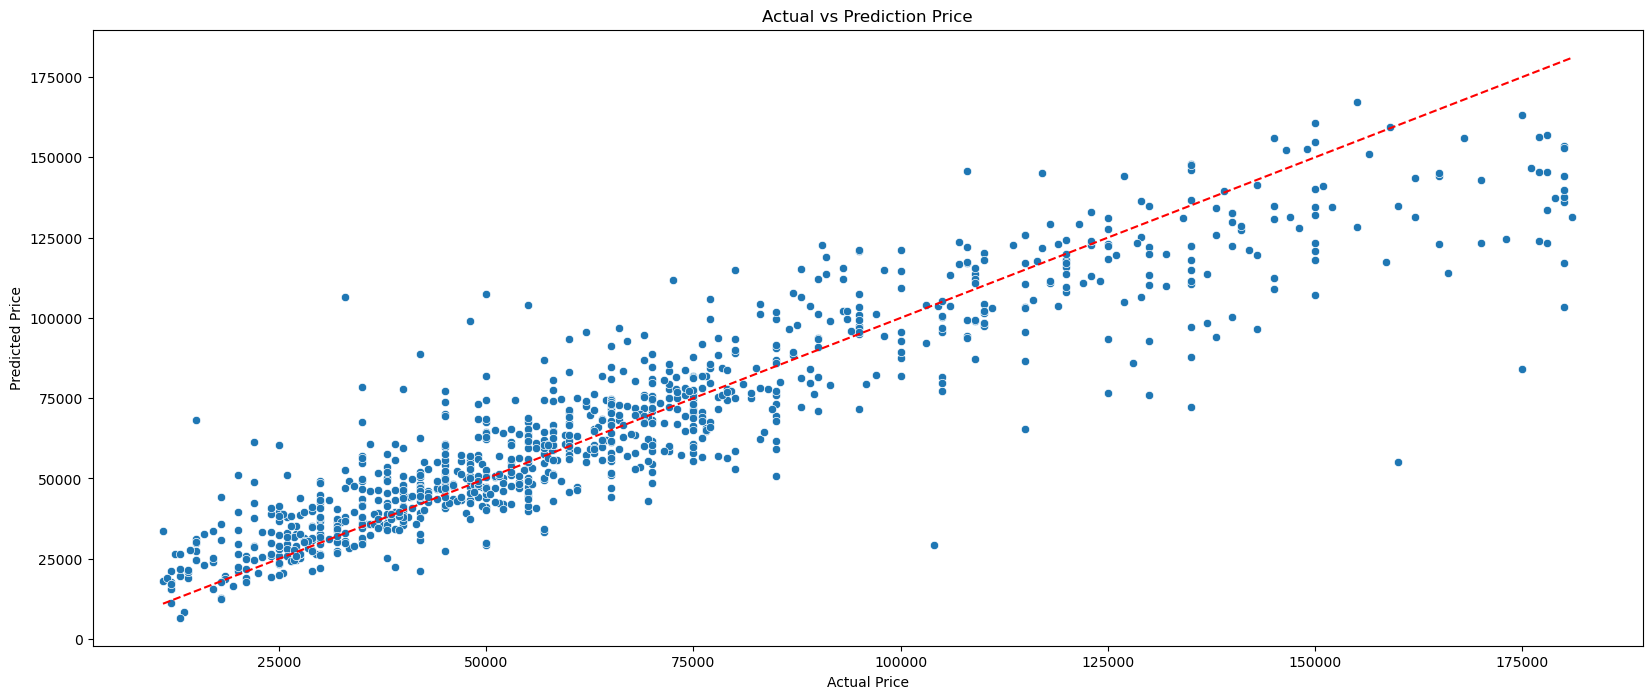

In [102]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Actual vs Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

Berdasarkan scatter plot menunjukkan bahwa hasil prediksi model tergolong baik. Nilai akhir dari evaluation metrix (MAPE) yang diperoleh sebesar 0.189958 atau 18.9%. Berdasarkan Gilliad, Michael(2010) menyatakan bahwa nilai MAPE 10%-19% tergolong "Good" atau dapat dikatakan acceptable level of forecast

### **4.6. Evaluasi Model dengan Residual Plot**

### **Residual Plot**

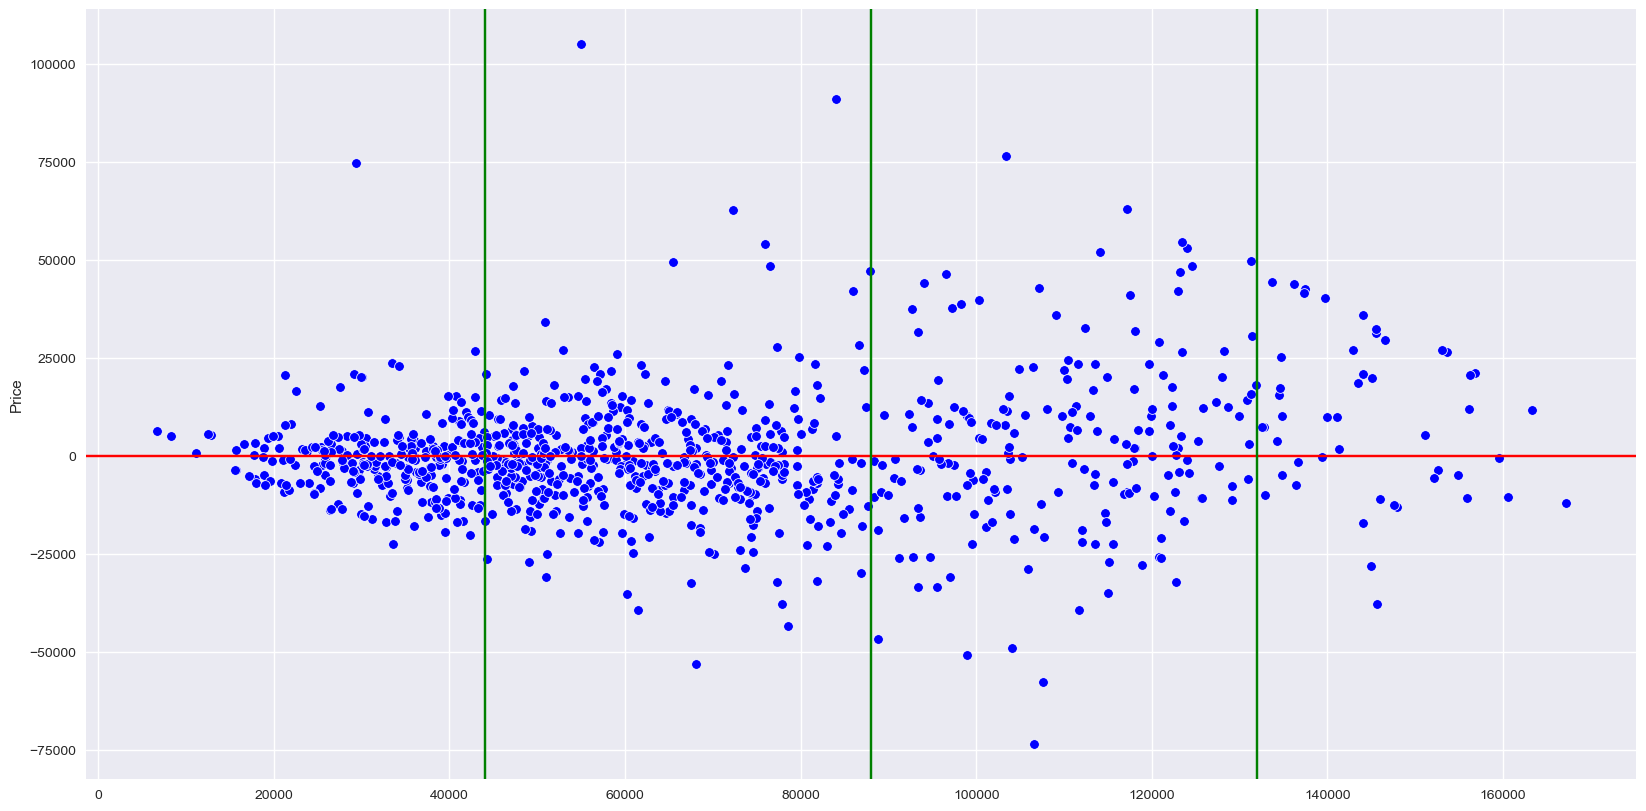

In [121]:
plt.figure(figsize= (20, 10))

sns.scatterplot(x= y_pred_xgb_tuning, y= y_test - y_pred_xgb_tuning, color= 'blue')
plt.axhline(0, color='red')

for val in range(44000, 175000, 44000):
    plt.axvline(val, color='green')

plt.grid(True)

plt.show()

Plot ini menggambarkan persebaran nilai error terhadap harga aktual, garis merah pada plot menggambarkan prediksi sempurna. Dari plot di atas kita bisa melihat bahwa pada nilai yang rendah (< 44000) model cenderung melakukan overestimate dimana nilai prediksi lebih tinggi dibandingkan nilai aktual, lalu sampai nilai sekitar 88000 persebaran error pada model melebar, lalu di atas 88000 persebaran error mulai mengecil.

Kita dapat mengevaluasi model dengan melakukan segmentasi berdasarkan persebaran nilai residual hasil diprediksi. Dengan melakukan segmentasi, kita dapat mengidentifikasi rentang nilai di mana model kita paling baik dalam memprediksi. Gambaran segmentasi yang akan kita lakukan divisualisasikan dengan garis hijau pada plot

### **Hasil Prediksi Berdasarkan Segmentasi**

In [122]:
y_test_s1 = y_test[y_test <= 44000]
y_test_s2 = y_test[y_test.between(44000, 88000)]
y_test_s3 = y_test[y_test.between(88000, 132000)] 
y_test_s4 = y_test[y_test >= 132000]

In [123]:
X_segmen_1 = X_test.loc[y_test[y_test <= 44000].index]
X_segmen_2 = X_test.loc[y_test[y_test.between(44000, 88000)].index]
X_segmen_3 = X_test.loc[y_test[y_test.between(88000, 132000)].index]
X_segmen_4 = X_test.loc[y_test[y_test >= 132000].index]

In [124]:
list_segmen = [X_segmen_1, X_segmen_2, X_segmen_3, X_segmen_4]
list_y_test = [y_test_s1, y_test_s2, y_test_s3, y_test_s4]

rmse = []
mae = []
mape = []

for segmen, y_test_segmen in zip(list_segmen, list_y_test):
    test_segmen = random_xgb.best_estimator_

    test_segmen.fit(X_train, y_train)
    y_pred_segmen = test_segmen.predict(segmen)
    rmse.append(np.sqrt(mean_squared_error(y_test_segmen, y_pred_segmen)))
    mae.append(mean_squared_error(y_test_segmen, y_pred_segmen))
    mape.append(mean_absolute_percentage_error(y_test_segmen, y_pred_segmen))


In [125]:
segment_names = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4']
ranges = ['<= 44000', '44000 - 88000', '88000 - 132000', '>= 132000']
score_segment = pd.DataFrame({
    'Segment': segment_names,
    'Range': ranges,
    'RMSE': rmse,
    'MAE': mae,
    'MAPE': mape
})

score_segment

,Segment,Range,RMSE,MAE,MAPE
0,Segment 1,<= 44000,11807.583280,1.394190e+08,0.303097
1,Segment 2,44000 - 88000,11941.251344,1.425935e+08,0.142177
2,Segment 3,88000 - 132000,16840.294860,2.835955e+08,0.115877
3,Segment 4,>= 132000,32977.013735,1.087483e+09,0.168829


Model ini memiliki prediksi terbaik di range nilai antara 88000 sampai 132000, sementara prediksi terburuk ada di range nilai di bawah 44000

### **4.7. Feature Importances**


Melakukan seleksi terhadap fitur-fitur yang berpengaruh terhadap target variabel yaitu Price (Harga mobil bekas)

In [103]:
xgb_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region',
                                                   'Make'])])),
                ('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=...
                              feature_types=None, gamma=8, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.08,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=192,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=0, ...))])

In [104]:
col_onehot = xgb_tuning[0].transformers_[0][1].get_feature_names_out()
col_onehot

array(['Gear_Type_Manual', 'Origin_Other', 'Origin_Saudi',
       'Origin_Unknown', 'Options_Semi Full', 'Options_Standard'],
      dtype=object)

In [105]:
col_binary= xgb_tuning[0].transformers_[1][1].get_feature_names_out()
col_binary

['Type_0',
 'Type_1',
 'Type_2',
 'Type_3',
 'Type_4',
 'Type_5',
 'Type_6',
 'Type_7',
 'Region_0',
 'Region_1',
 'Region_2',
 'Region_3',
 'Region_4',
 'Make_0',
 'Make_1',
 'Make_2',
 'Make_3',
 'Make_4',
 'Make_5']

In [106]:
list_column_remainder=[]

for i in range(6,9):
    list_column_remainder.append(df_cars.columns[i])

col_remainder = list_column_remainder
col_remainder

['Year', 'Engine_Size', 'Mileage']

In [107]:
df_feature_imp = pd.DataFrame()
df_feature_imp['Features'] =  list(col_onehot)+list(col_binary)+col_remainder
df_feature_imp['Importances'] = xgb_tuning[2].feature_importances_

In [108]:
df_feature_imp.sort_values(by='Importances',ascending=False, inplace=True)
df_feature_imp

,Features,Importances
25,Year,0.112634
22,Make_3,0.102661
26,Engine_Size,0.099946
5,Options_Standard,0.082405
21,Make_2,0.047844
24,Make_5,0.046577
12,Type_6,0.039789
6,Type_0,0.038504
10,Type_4,0.037310
23,Make_4,0.035251


''

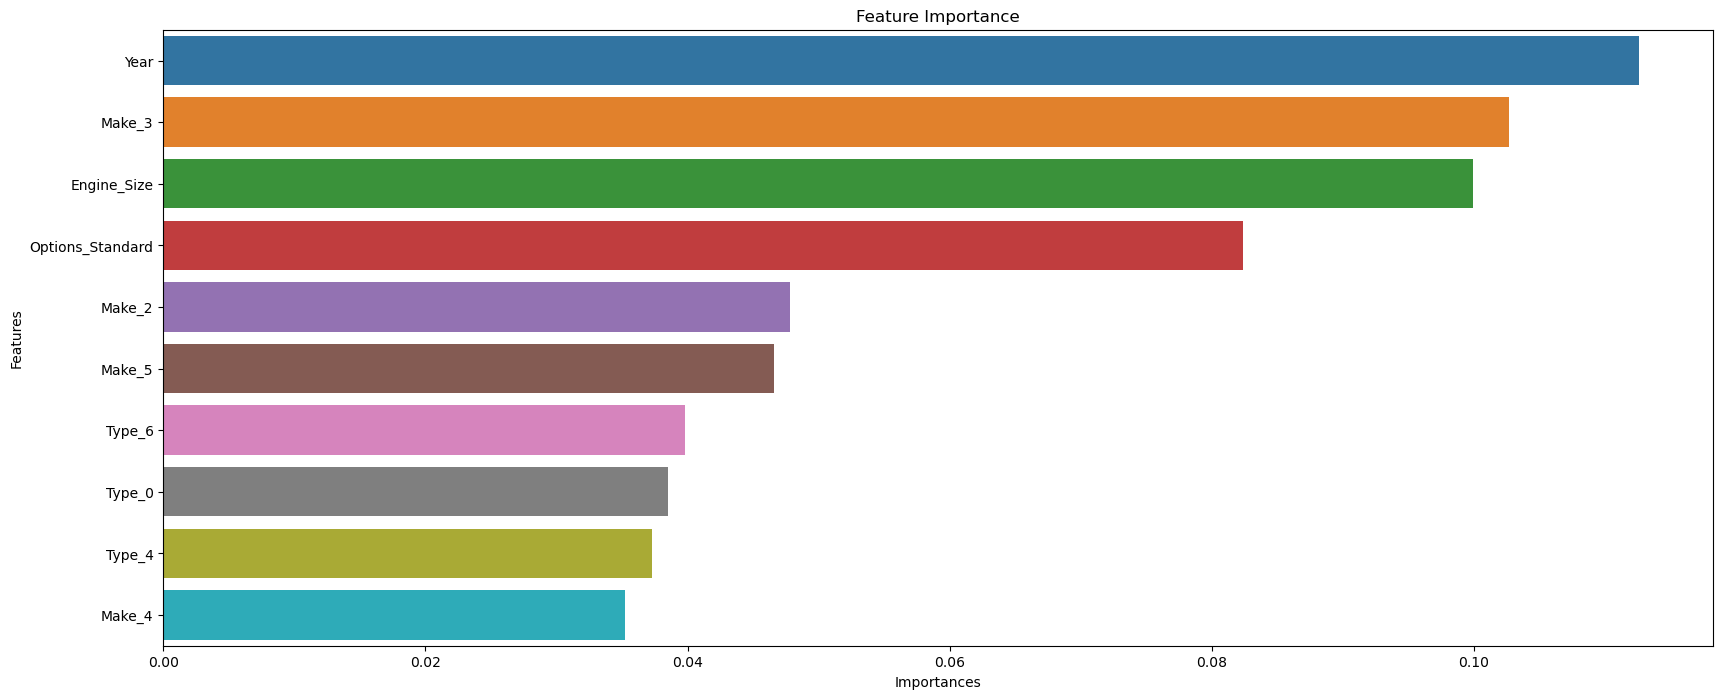

In [109]:
plt.figure(figsize=(20, 8))
sns.barplot(
    data=df_feature_imp.head(10),
    x='Importances',
    y='Features'
)
plt.title('Feature Importance')
;

Output dari plot ini tidak menampilkan semua kolom feature karena feature terkena penalti oleh parameter regularisasi alpha. Regularisasi alpha bisa membuat coeffisien dari feature yang terkena penalti bernilai 0.

- Hasil dari feature importance sesuai dengan EDA yang sudah kita lakukan dimana memang ada korelasi kuat antara Year dengan Price. 
- Make juga memiliki hubungan dengan Price, dimana ada kecenderungan Make Toyota memilki nilai Price yang lebih tinggi dibanding Make lain.

Dari sini kita bisa simpulkan bahwa tahun dan Make adalah feature yang paling mempengaruhi harga mobil, karakteristik dari mobil bekas seperti Origin dan Region dari mobil bekas itu sendiri tidak terlalu berpengaruh terhadap harga mobil bekas.

### **4.8. Limitation**

- Hasil prediksi model masih cenderung menghasilkan nilai yang agak tinggi (overestimate) atau agak rendah (underestimate)
- Range parameter yang digunakan saat hyperparameter tuning masih terlalu sedikit. Jika kita lihat dari residual plot, ada kemungkinan kita bisa mendapatkan hasil yang lebih baik dengan model yang lebih kompleks
- Model ini hanya memberikan hasil yang baik pada rentang fitur yang terdapat dalam dataset.

Berikut adalah rentang fitur dalam dataset :

In [126]:
list_min = []
list_max = []
for column in df_cars_wo_outliers.iloc[:, :-2].columns:
    min_range = df_cars_wo_outliers[column].min()
    max_range = df_cars_wo_outliers[column].max()

    list_min.append(min_range)
    list_max.append(max_range)

In [127]:
range_feature = pd.DataFrame({
    'Feature' : df_cars_wo_outliers.iloc[:, :-2].columns,
    'min_range' : list_min,
    'max_range' : list_max
})
range_feature

,Feature,min_range,max_range
0,Type,2,i40
1,Region,Abha,Yanbu
2,Make,Aston Martin,Škoda
3,Gear_Type,Automatic,Manual
4,Origin,Gulf Arabic,Unknown
5,Options,Full,Standard
6,Year,2001,2021
7,Engine_Size,1.0,9.0


In [129]:
range_feature.iloc[[0, 6, 7]]

,Feature,min_range,max_range
0,Type,2,i40
6,Year,2001,2021
7,Engine_Size,1.0,9.0


## **5. Conclusion and Recommendation**

### **5.1. Conclusion**

**Kesimpulan dari Segi Model**
- Model terbaik berdasarkan cross validation adalah XGBRegressor
- Terjadi peningkatan performa setelah dilakukan tuning pada benchmark model
- Model akhir yang kita pakai adalah model XGBRegressor terbaik berdasarkan mean, karena model ini memiliki nilai RMSE, MAE dan MAPE paling kecil
- Model memiliki performa terbaik saat mempredisi nilai di antara 88000 sampai 132000 (segmen 3)
- Metode preprocesiing terbaik untuk modeling :
    - encoding = OneHotEncoder, BinaryEncoder
    - scaling = StandardScaler
- Parameter terbaik untuk modeling :
    - subsample= 0.8 
    - reg_alpha= 0.46415888336127775 
    - n_estimators= 192 
    - max_depth= 6 
    - learning_rate= 0.08 
    - gamma= 8 
    - colsample_bytree= 0.6
- Feature yang berpengaruh terhadap Price adalah Year dan Make


**Kesimpulan dari Segi Business**

Machine learning dapat digunakan untuk membantu perusahaan mobil bekas dalam menentukan harga jual mobil bekas yang tepat. Hasil evaluasi model memiliki performa yang cukup baik, dimana model hanya memiliki tingkat kesalahan prediksi sebesar 18.9%. Dan berdasarkan hasil evaluasi lebih lanjut dengan melakukan prediksi berdasarkan segmen, model kita mempunyai performa yang sangat baik dengan persentase error:
- segmen 1 : 30.3 %
- segmen 2 : 14.2 %
- segmen 3 : 11.6 %
- segmen 4 : 16.9 %

Namun perlu diingat prediksi model masih cenderung menghasilkan nilai yang agak tinggi (overestimate) atau agak rendah (underestimate), khususnya pada feature dengan karakteristik segmen 1 (Price <= 88000)


### **5.2 Recommendation**

Berikut ini adalah beberapa rekomendasi yang dapat dilakukan untuk meningkatkan performa model:

1. Menambahkan fitur yang mengkategorikan jenis mobil menjadi classic atau non-classic dan mobil luxury atau non-luxury. Hal ini penting karena harga mobil bekas terhadap mileage dan tahun pembuatan dapat berbeda secara signifikan antara mobil-mobil classic, mobil-mobil luxury dan mobil-mobil biasa.

1. Karena keterbatasan hardware, range hyperparameter yang digunakan untuk model ini sebenarnya masih kurang, oleh karena itu kita bisa melakukan tuning dengan hyperparameter yang lebih banyak jika menggunakan device yang lebih baik. Dengan memperlebar atau menambahkan range hyperparameter kita bisa membuat model yang lebih kompleks, yang diharapkan bisa meningkatkan performa model.

1. Melakukan evaluasi berkala terhadap performa model. Terkhusus pada segment 1 dimana harga mobil bekas dibawah 88000. Perlu adanya penambahan data ataupun pengolahan data lebih lanjut agar data yang digunakan bisa menghasilkan prediksi lebih baik lagi.


## **6. Save Final Model**

Karena sudah dilakukan penyimpanan model di atas, maka yang akan kita lakukan adalah mencoba load model yang sudah disimpan dan melakukan prediksi.

In [130]:
# Load Model
test_load = pickle.load(open('ModelC3_SaudiUsedCar_XGB.sav','rb'))
test_load

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region',
                                                   'Make'])])),
                ('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=...
                              feature_types=None, gamma=8, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.08,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=192,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=0, ...))])

In [148]:
test_target = y[300]

In [149]:
X.iloc[[36]]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
64,FJ,Jeddah,Toyota,Automatic,Saudi,Full,2015,4.0,228000


In [150]:
test_predict = test_load.predict(X.iloc[[300]])

In [151]:
true_value = y[300]
predicted_value = test_load.predict(X.iloc[[300]])

mse = mean_squared_error([true_value], [predicted_value])
rmse = np.sqrt(mse)
mae = mean_absolute_error([true_value], [predicted_value])
mape = mean_absolute_percentage_error([true_value], [predicted_value])

display(rmse, mae, mape)

7363.1875

7363.1875

0.08273244382022472